#  Data Cleansing

####  Name: Bolin Yang

Date: 06/05/2019

Environment: Python 3.7 and Jupyter notebook
Libraries used: 
* re (for regular expression, included in Anaconda Python 3.6) 
* pandas
* sklearn
* numpy
* datetime
* matplotlib
* networkx (for calculate geographic distance by Dijkstra algorithm, need pip install)


## 1. Introduction
For this assessment, you are required to write Python (Python 2/3) code to analyze your dataset, find and fix the problems in the data.
For dirty data file, 1,find and fix error for lattitude and longitude for Origin and Destination;
2, draw plot and calculate the distance on earth to find Region error in Origin an Destination;
3, find and fix departure time error and classify them to 0/1;
4, Check and fix error of Journey Distance and Travel Time
5, fix error of departure and arrival time 
6, fix Urber Type error by customerID
For missing file, combine cleaning data and complete data as train data to buil linear model for 3 Uber Type;
For Outlier file, same as missing value, do prediction then use mean and 3std to find outlier

## 2. Import Libraries

In [462]:
import pandas as pd
import numpy as np
#Basic python libs
import re
import random
from datetime import datetime
from datetime import time
from dateutil import parser
#Sklearn libs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
# Configure visualisations
%matplotlib inline
#pip install Dijkstar 
#from dijkstar import Graph, find_path
import networkx as nx

## 3. Detect and fix errors

### 3.1 EDA for data
* read data file and EDA for data

In [3]:
pd.set_option("precision",9)

In [4]:
df=pd.read_csv("Data_file/task3_dirty_data.csv")
nodes = pd.read_csv("nodes_edges/nodes.csv")
edges = pd.read_csv("nodes_edges/edges.csv")

In [5]:
df.shape

(325, 14)

we can see that there are 325 rows and 14 columns in this dirty data, which means that 325 observations and 14 attributes in the data, then specifily see the firstly few lines in data.

In [6]:
df.head(10)

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3185982623,1,4,3,-37.8167945,145.0073797,-37.8199344,144.9812137,2735.1,2018-02-09,23:56:58,711.00,0:08:49,19.24
1,ID3897046466,1,3,7,-37.8215272,145.0018593,-37.8618349,144.9057160,10725.4,2018-03-10,20:15:55,3423.54,21:12:58,29.81
2,ID3797586685,1,1,8,-37.8069403,144.9488771,-37.8158343,145.0464500,8791.0,2018-05-16,13:19:20,2518.50,14:01:18,20.87
3,ID3303585585,1,6,3,-37.7907967,144.9858650,-37.8164564,144.9790645,3277.0,2018-07-11,06:46:43,939.00,7:02:22,10.86
4,ID1343562486,0,2,4,-37.8135309,144.9408347,-37.7998614,144.9932054,5580.0,2018-02-21,00:23:36,1398.36,0:46:54,9.88
5,ID3313708594,1,8,4,-37.8158343,145.0464500,-37.8048419,144.9934812,5344.0,2018-02-14,21:36:12,1683.78,22:04:15,22.41
6,ID1999960119,0,7,6,-37.8618349,144.9057160,-37.7907967,144.9858650,11711.0,2018-05-23,05:55:10,3859.80,6:59:29,12.17
7,ID3188303691,1,8,3,-37.8158343,145.0464500,-37.8212343,144.9837377,6502.0,2018-05-26,12:38:41,1915.32,13:10:36,23.43
8,ID3226726876,1,4,7,-37.8048211,144.9937810,-37.8618349,144.9057160,11110.0,2018-07-05,13:09:34,3635.04,14:10:09,24.98
9,ID1166078821,0,5,2,-37.8051240,144.9370784,-37.8210485,144.9473608,2238.0,2018-01-18,07:06:54,581.46,7:16:35,4.33


In [7]:
nodes.head(10)

,Unnamed: 0,lat,lon
0,711327755,-37.8076750,144.9558726
1,711327756,-37.8070943,144.9559785
2,711327759,-37.8073009,144.9578172
3,711327760,-37.8078848,144.9577193
4,777781264,-37.8052207,144.9521732
5,711327758,-37.8062498,144.9580023
6,164102232,-37.8203223,144.9675308
7,26476632,-37.8227347,144.9311156
8,26476637,-37.8262913,144.9306190
9,26476642,-37.8262801,144.9307411


In [8]:
edges.head(10)

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0
5,7,711327756,711331420,44.0,0,10.0
6,8,711327759,711331451,8.0,2,20.0
7,10,711327759,703557072,5.0,1,15.0
8,11,711327759,711331434,32.0,0,10.0
9,12,711327760,603633283,14.0,2,20.0


The table above simply shows sense of the variables, their class type, and the first few observations that each journey has an unique id and other attributes contain the information about the trip type, departure and arrival region, point and  time of each journey. 

* Categorical variables:<font color="blue">Uber Type</font>, <font color="blue">Origin Region</font>, <font color="blue">Destionation Region</font>, <font color="blue">who</font>, <font color="blue">embark_town</font>, <font color="blue">alive</font>, <font color="blue">alone</font>, and <font color="blue">name</font>, <font color="blue">deck</font>
* numerical features:
    * Continuous: <font color="blue">fare</font>, <font color="blue">Journey Distance</font>, <font color="blue">Origin Latitude</font>, <font color="blue">Origin Longtitude</font>, <font color="blue">Destination Latitude</font>, <font color="blue">Destination Longtitude</font>
* datetime: <font color="blue">departure date</font>, <font color="blue">departure time</font>, <font color="blue">arrival time</font>, <font color="blue">travel time</font>,

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 14 columns):
Unnamed: 0               325 non-null object
Uber Type                325 non-null int64
Origin Region            325 non-null int64
Destination Region       325 non-null int64
Origin Latitude          325 non-null float64
Origin Longitude         325 non-null float64
Destination Latitude     325 non-null float64
Destination Longitude    325 non-null float64
Journey Distance(m)      325 non-null float64
Departure Date           325 non-null object
Departure Time           325 non-null object
Travel Time(s)           325 non-null float64
Arrival Time             325 non-null object
Fare$                    325 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 35.6+ KB


In [10]:
df.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,325.000000000,325.000000000,325.000000000,325.000000000,325.000000000,325.000000000,325.000000000,325.000000000,325.000000000,325.000000000
mean,0.643076923,4.889230769,5.033846154,-36.677053175,144.939391259,-36.686909568,144.927759813,15662.551384615,4088.568984615,40.535138462
std,0.699640391,2.508019426,2.569183285,9.325900345,0.096057882,9.334793801,0.110858248,16323.521232910,3935.177992593,79.896211392
min,0.000000000,1.000000000,1.000000000,-38.110915600,144.654172500,-38.110915600,144.654172500,796.000000000,179.400000000,3.090000000
25%,0.000000000,3.000000000,3.000000000,-37.822280300,144.927725100,-37.824450000,144.926334400,5372.000000000,1412.460000000,10.830000000
50%,1.000000000,5.000000000,5.000000000,-37.814625600,144.956336300,-37.814419500,144.951321400,8591.000000000,2572.260000000,16.280000000
75%,1.000000000,7.000000000,7.000000000,-37.806399500,144.990882700,-37.804995100,144.988033300,13562.000000000,4192.260000000,30.410000000
max,3.000000000,9.000000000,9.000000000,37.861834900,145.046450000,38.110915600,145.046450000,51061.000000000,13204.980000000,685.690000000


By detecting the distribution of numerical and categorical variables, we can simply detect if there are problems about data.
* there are only three types in Uber Type, but there are four kinds of value: 0,1,2,3
* most value of Origin Latitude is about -37, but the max is 37.861835,so we have to check the range of Latitude in nodes.csv to see if it is error, and the values of Destination Latitude are the same.
* the distribute of Origin Region and Dest Region looks similar, so the distance of journey might not too long, we have to detect error according the Origin Longitude and Latitude
* Fare: every journey has a fare, we can see that the the max value is very larger than min valve and mean, so the there might be some very long distance journey  

In [11]:
nodes.describe()

,Unnamed: 0,lat,lon
count,1.711700000e+04,17117.000000000,17117.000000000
mean,2.023147152e+09,-37.812450757,144.966743144
std,1.978621402e+09,0.008005388,0.021437527
min,2.157811400e+07,-38.110915600,144.654172500
25%,4.888793370e+08,-37.818766500,144.951965400
50%,8.465676580e+08,-37.812766600,144.964104400
75%,3.215191999e+09,-37.806184700,144.981580700
max,6.282174159e+09,-37.739635900,145.046450000


In [12]:
df.describe(include=['O'])

,Unnamed: 0,Departure Date,Departure Time,Arrival Time
count,325,325,325,325
unique,325,164,324,325
top,ID1375795511,2018-01-15,06:05:50,14:36:28
freq,1,7,2,1


Every journey has a unique arrival time, there are not only one journey occurs in a same day, and also two of journeys starts at the same time.

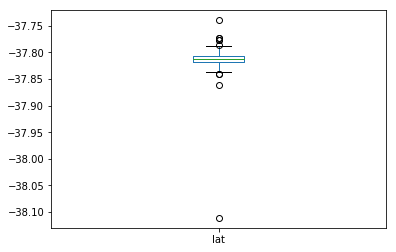

In [13]:
#boxplot of.
boxplot = pd.DataFrame(nodes['lat'])
boxplot.plot(kind='box')

The boxplot shows that the range of latitude should be from -38.1 to -37.75.

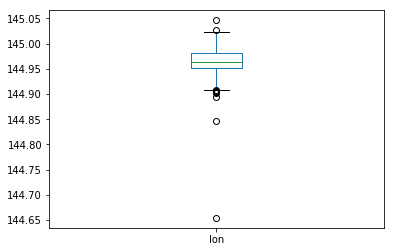

In [14]:
boxplot = pd.DataFrame(nodes['lon'])
boxplot.plot(kind='box')

The boxplot shows that the range of Longitude should be from 144.65 to 145.05.

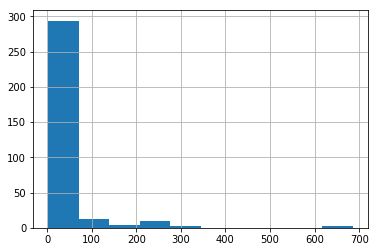

In [15]:
#drwa histgram
df['Fare$'].hist()

This histgrm shows that almost journey fare are not higher than 100, which can helps as to compare with the prediction later.

### 3.2 Check and fix error of  Latitude and Longitude

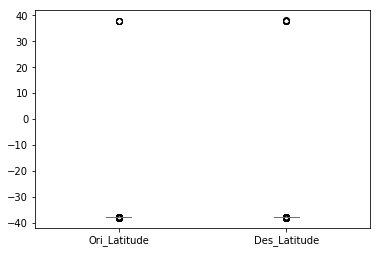

In [16]:
#The Origin Latitiude and Destination Latitude
boxplot = pd.DataFrame({'Ori_Latitude': df['Origin Latitude'],'Des_Latitude': df['Destination Latitude']})
boxplot.plot(kind='box')

we see that there are errors in Origin and Destination Latitude, some points is out of the range of node(from -38.1 to -37.75)as is shown above

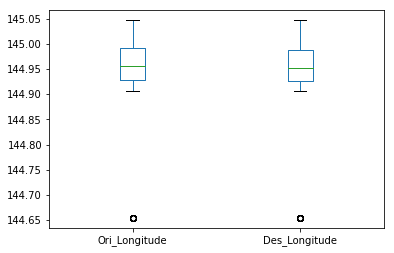

In [17]:
boxplot = pd.DataFrame({'Ori_Longitude': df['Origin Longitude'],'Des_Longitude': df['Destination Longitude']})
boxplot.plot(kind='box')

It can see that the Longitude is in the range of lon in nodes, so we find the given Longitude of  Origin and Destination in nodes to check the corresponding Latitude in one row.

In [18]:
#the error value of Latitude in df
df['Origin Latitude'][df['Origin Latitude']>0]

60    37.7738026
66    37.8618349
69    37.8046676
70    37.8113599
72    37.8090233
Name: Origin Latitude, dtype: float64

In [19]:
# see the true value in nodes
lat_err = list(df['Origin Longitude'][df['Origin Latitude']>0])
b = list(nodes['lon'])
for each in lat_err:
    if each in b:
        #print(each)
        c = nodes['lat'][nodes['lon']== each]
        print(c)

2036   -37.7738026
Name: lat, dtype: float64
4485   -37.8618349
Name: lat, dtype: float64
8245   -37.8046676
Name: lat, dtype: float64
12093   -37.8113599
Name: lat, dtype: float64
700   -37.8090233
Name: lat, dtype: float64


In [20]:
#fix the error in latitude of df
index = [60,66,69,70,72]
for i in range(len(index)):
    v = 0-list(df['Origin Latitude'])[index[i]]
    df.loc[index[i],'Origin Latitude'] = v
   

In [21]:
#do same in destination latitude
df['Destination Latitude'][df['Destination Latitude']>0]
indexs = [74, 77, 80, 82, 83]
for i in range(len(indexs)):
    vs = 0-list(df['Destination Latitude'])[indexs[i]]
    #print(vs)
    df.loc[indexs[i],'Destination Latitude'] = vs

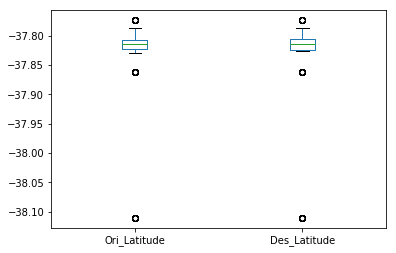

In [22]:
boxplot_new = pd.DataFrame({'Ori_Latitude': df['Origin Latitude'],'Des_Latitude': df['Destination Latitude']})
boxplot_new.plot(kind='box')

the value range of Origin and Destination of Latitude in df smaller than nodes

In [23]:
df_L = df.copy()
df_L[df_L['Destination Latitude']>0]
df_L[df_L['Origin Latitude']>0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


### 3.3 Check and fix error of Region

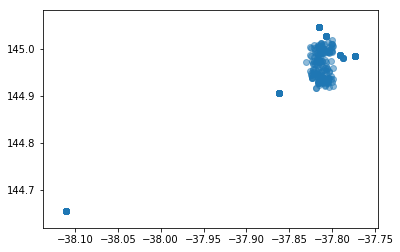

In [24]:
#See the basic distribution of whole data in plot 
x = df_L['Origin Latitude']
y = df_L['Origin Longitude']
plt.scatter(x, y, alpha=0.5)

In [25]:
#Calculate the great circle distance between two points on the earth (specified in decimal degrees)
from math import radians, cos, sin, asin, sqrt
def calDistance(p1, p2): 
    r = 6378   # radius of the earth
    
    lat1, lon1 = p1[0], p1[1]
    lat2, lon2 = p2[0], p2[1]
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    return c * r

In [26]:
def regdist(reg):
    distan = []
    big = []
    max_dis = {}
    for j in range(len(reg[0])):
            point = []    #one data point
            point1_lat = reg[0][j]
            point1_lon = reg[1][j]
            point.append(point1_lat)
            point.append(point1_lon)
            big.append(point)
            
    #print(big,len(big))    
    count = 0
    for i in range(len(big)):
        count = count + 1
        #print(count)
        element = big[0]
        big.pop(0)
        for each in big:
            dist = calDistance(element,each)
            max_dis[dist] = [element,each]
            
            distan.append(max_dis)
            #print(element,each,dist)
            #print(len(big))
    max_key = max(max_dis.keys())
    max_value = max_dis[max_key]
        
    return max_key, max_value    

In [27]:
#build a dict to store the data, key is region.No, value are the lattitude and longitude of the points in each region 
dic = {}
for i in range(1,10):
    lo = []
    lat = list(df_L["Origin Latitude"][df_L["Origin Region"] == i])
    lon = list(df_L["Origin Longitude"][df_L["Origin Region"] == i])
    lo.append(lat)
    lo.append(lon)
    dic[str(i)]=lo

In [28]:
for i in range(1,len(dic)+1):
    print(regdist(dic[str(i)]))

(3.6628938434860143, [[-37.8151591, 144.93646280000002], [-37.8013693, 144.9742775]])
(7.339785561476773, [[-37.818735600000004, 144.91662390000002], [-37.8145049, 144.99991740000002]])
(3.549635441821857, [[-37.8215393, 145.007936], [-37.8220486, 144.96757309999998]])
(2.48072079351884, [[-37.8006735, 145.0184852], [-37.8096666, 144.9926783]])
(6.260491218863227, [[-37.7907967, 144.985865], [-37.815589, 144.9219752]])
(1.9035273964439903, [[-37.7908183, 144.9857929], [-37.7738026, 144.98364660000001]])
(8.11231194349739, [[-37.8210375, 144.9821816], [-37.8618349, 144.90571599999998]])
(1.989814412893548, [[-37.807202000000004, 145.0266373], [-37.8158343, 145.04645]])
(0.0, [[-38.1109156, 144.65417250000002], [-38.1109156, 144.65417250000002]])


There are some value of distances  more longer than other regions, which are "2", "5", "7", see points in the plot and compare with the pair of points in right region to find the point in wrong region and fix it.

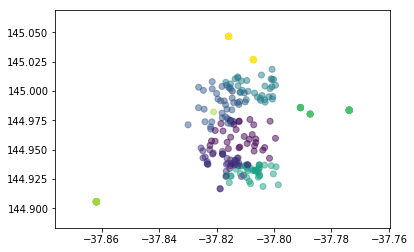

In [29]:
'''See the data point within one region in plot firstly,since the distance between points are close 0 in region 9 
and far away from other region, we see points in other region

'''
df_L2=df_L[df_L["Origin Region"] != 9]
plt.scatter(df_L2["Origin Latitude"],df_L2["Origin Longitude"],c=df_L2["Origin Region"],alpha=0.5)

In [30]:
#In region"2", the point[-37.8145049, 144.99991740000002] is different from other, 
#compare with points' range of region,then we change it to region "3"
df_L[df_L["Origin Latitude"] == -37.8145049]
df_L.loc[27,"Origin Region"] =3

#By using similar method to find other error regions of point and fix them
#Error in Region "5": [-37.7907967, 144.985865]
df_L[df_L["Origin Latitude"] == -37.7907967][df_L["Origin Longitude"] == 144.985865]
df_L.loc[26,"Origin Region"] = 6

#Error in Region "7": 8.11231194349739, [[-37.8210375, 144.9821816] 
df_L[df_L["Origin Latitude"] == -37.8210375]#[df_L["Origin Longitude"] == 44.90571599999998]
df_L.loc[21,"Origin Region"] = 3


/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [31]:
#see the result agaion
dic = {}
for i in range(1,10):
    lo = []
    lat = list(df_L["Origin Latitude"][df_L["Origin Region"] == i])
    lon = list(df_L["Origin Longitude"][df_L["Origin Region"] == i])
    lo.append(lat)
    lo.append(lon)
    dic[str(i)]=lo

for i in range(1,len(dic)+1):
    print(regdist(dic[str(i)]))

(3.6628938434860143, [[-37.8151591, 144.93646280000002], [-37.8013693, 144.9742775]])
(3.1535880268241474, [[-37.818735600000004, 144.91662390000002], [-37.8254058, 144.95147980000002]])
(3.549635441821857, [[-37.8215393, 145.007936], [-37.8220486, 144.96757309999998]])
(2.48072079351884, [[-37.8006735, 145.0184852], [-37.8096666, 144.9926783]])
(2.166569006988159, [[-37.815589, 144.9219752], [-37.799296000000005, 144.9354505]])
(1.9035273964439903, [[-37.7908183, 144.9857929], [-37.7738026, 144.98364660000001]])
(0.0, [[-37.8618349, 144.90571599999998], [-37.8618349, 144.90571599999998]])
(1.989814412893548, [[-37.807202000000004, 145.0266373], [-37.8158343, 145.04645]])
(0.0, [[-38.1109156, 144.65417250000002], [-38.1109156, 144.65417250000002]])


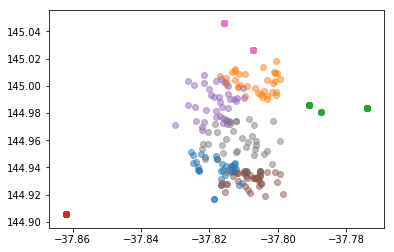

In [32]:
x1 = df_L['Origin Latitude'][df_L['Origin Region']== 2]
y1 = df_L['Origin Longitude'][df_L['Origin Region']== 2]
x2 = df_L['Origin Latitude'][df_L['Origin Region']== 4]
y2 = df_L['Origin Longitude'][df_L['Origin Region']== 4]
x3 = df_L['Origin Latitude'][df_L['Origin Region']== 6]
y3 = df_L['Origin Longitude'][df_L['Origin Region']== 6]
x4 = df_L['Origin Latitude'][df_L['Origin Region']== 7]
y4 = df_L['Origin Longitude'][df_L['Origin Region']== 7]
x5 = df_L['Origin Latitude'][df_L['Origin Region']== 3]
y5 = df_L['Origin Longitude'][df_L['Origin Region']== 3]
x6 = df_L['Origin Latitude'][df_L['Origin Region']== 5]
y6 = df_L['Origin Longitude'][df_L['Origin Region']== 5]
x7 = df_L['Origin Latitude'][df_L['Origin Region']== 8]
y7 = df_L['Origin Longitude'][df_L['Origin Region']== 8]
x8 = df_L['Origin Latitude'][df_L['Origin Region']== 1]
y8 = df_L['Origin Longitude'][df_L['Origin Region']== 1]

plt.scatter(x1, y1, alpha=0.5)
plt.scatter(x2, y2, alpha=0.5)
plt.scatter(x3, y3, alpha=0.5)
plt.scatter(x4, y4, alpha=0.5)
plt.scatter(x5, y5, alpha=0.5)
plt.scatter(x6, y6, alpha=0.5)
plt.scatter(x7, y7, alpha=0.5)
plt.scatter(x8, y8, alpha=0.5)

In [ ]:
df_L2=df_L[df_L["Origin Region"] != 9]
plt.scatter(df_L2["Origin Latitude"],df_L2["Origin Longitude"],c=df_L2["Origin Region"],alpha=0.5)

#### find and fix error in Destination Region
By detecting the data points in the plot,we can find some region error points in other region with different coclours, find the lattitude and longitude for these points to fix region error

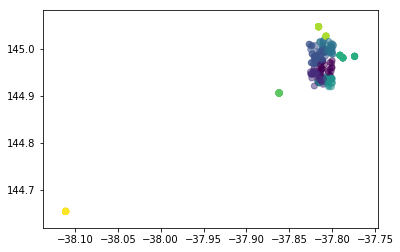

In [33]:
#Draw scatterplt to see data points
plt.scatter(df_L["Destination Latitude"],df_L["Destination Longitude"],c=df_L["Destination Region"],alpha=0.5)

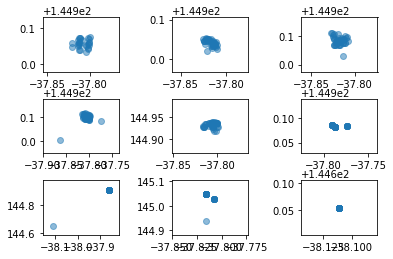

In [34]:
#See each region plot
plt.figure(9)         
plt.subplot(3,3,1)
x11 = df_L['Destination Latitude'][df_L['Destination Region']== 1]
y11 = df_L['Destination Longitude'][df_L['Destination Region']== 1]
plt.scatter(x11, y11, alpha=0.5)

#plt.figure(2)
plt.subplot(3,3,2)
x21 = df_L['Destination Latitude'][df_L['Destination Region']== 2]
y21 = df_L['Destination Longitude'][df_L['Destination Region']== 2]
plt.scatter(x21, y21, alpha=0.5)


#plt.figure(3)
plt.subplot(3,3,3)
x31 = df_L['Destination Latitude'][df_L['Destination Region']== 3]
y31 = df_L['Destination Longitude'][df_L['Destination Region']== 3]
plt.scatter(x31, y31, alpha=0.5)

#plt.figure(4)
plt.subplot(3,3,4)
x41 = df_L['Destination Latitude'][df_L['Destination Region']== 4]
y41 = df_L['Destination Longitude'][df_L['Destination Region']== 4]
plt.scatter(x41, y41, alpha=0.5)

#plt.figure(5)
plt.subplot(3,3,5)
x51 = df_L['Destination Latitude'][df_L['Destination Region']== 5]
y51 = df_L['Destination Longitude'][df_L['Destination Region']== 5]
plt.scatter(x51, y51, alpha=0.5)


#plt.figure(6)
plt.subplot(3,3,6)
x61 = df_L['Destination Latitude'][df_L['Destination Region']== 6]
y61 = df_L['Destination Longitude'][df_L['Destination Region']== 6]
plt.scatter(x61, y61, alpha=0.5)


#plt.figure(7)
plt.subplot(3,3,7)
x71 = df_L['Destination Latitude'][df_L['Destination Region']== 7]
y71 = df_L['Destination Longitude'][df_L['Destination Region']== 7]
plt.scatter(x71, y71, alpha=0.5)


#plt.figure(8)
plt.subplot(3,3,8)
x81 = df_L['Destination Latitude'][df_L['Destination Region']== 8]
y81 = df_L['Destination Longitude'][df_L['Destination Region']== 8]
plt.scatter(x81, y81, alpha=0.5)


plt.subplot(3,3,9)
x91 = df_L['Destination Latitude'][df_L['Destination Region']== 9]
y91 = df_L['Destination Longitude'][df_L['Destination Region']== 9]
plt.scatter(x91, y91, alpha=0.5)

plt.subplots_adjust(wspace = 0.7, hspace = 0.5)

In destination Region, the plot shows that in  Region3 one point error,in Region4 two point errors,in Region7 one point errors,in Region8 one point error

for the regions have errors, see the points in this region in map of Tableau separately.

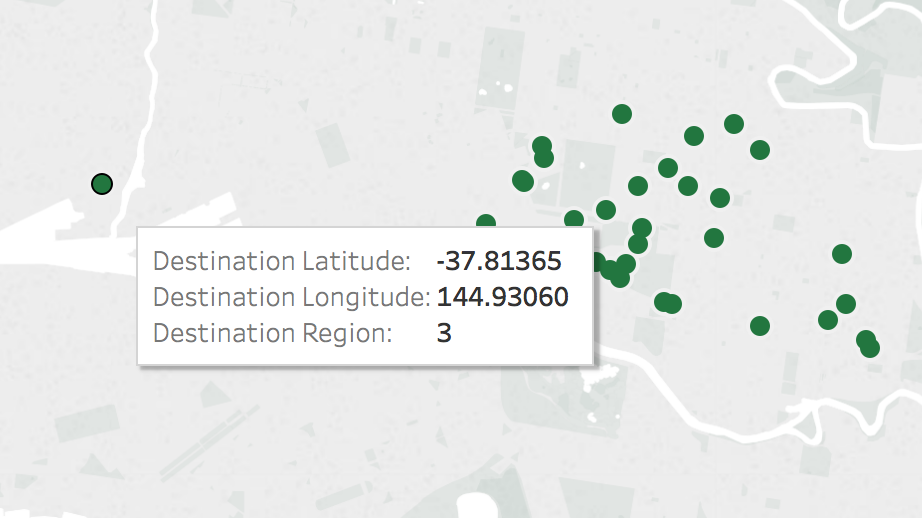

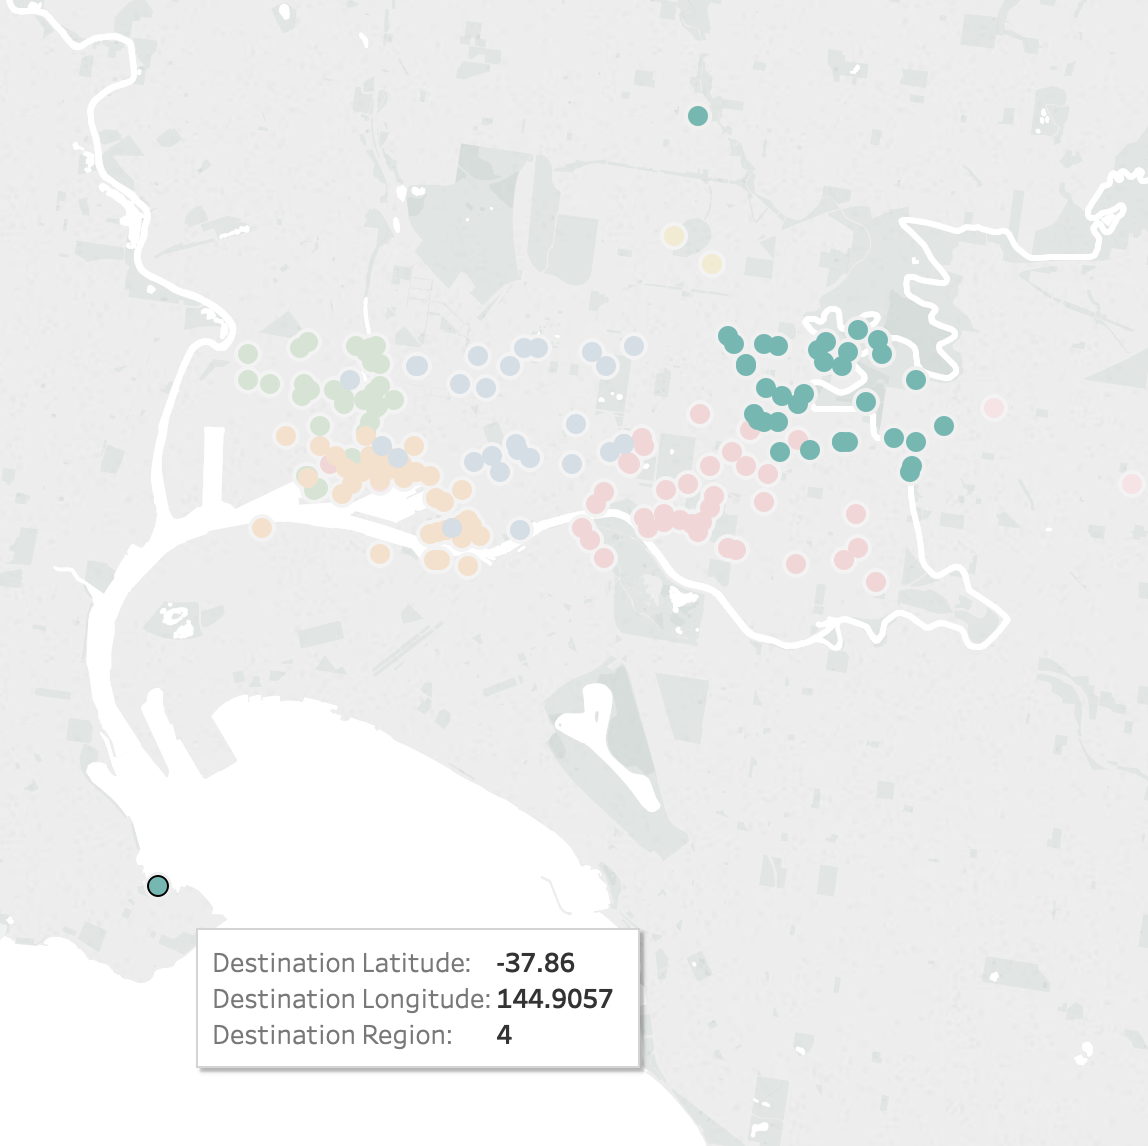

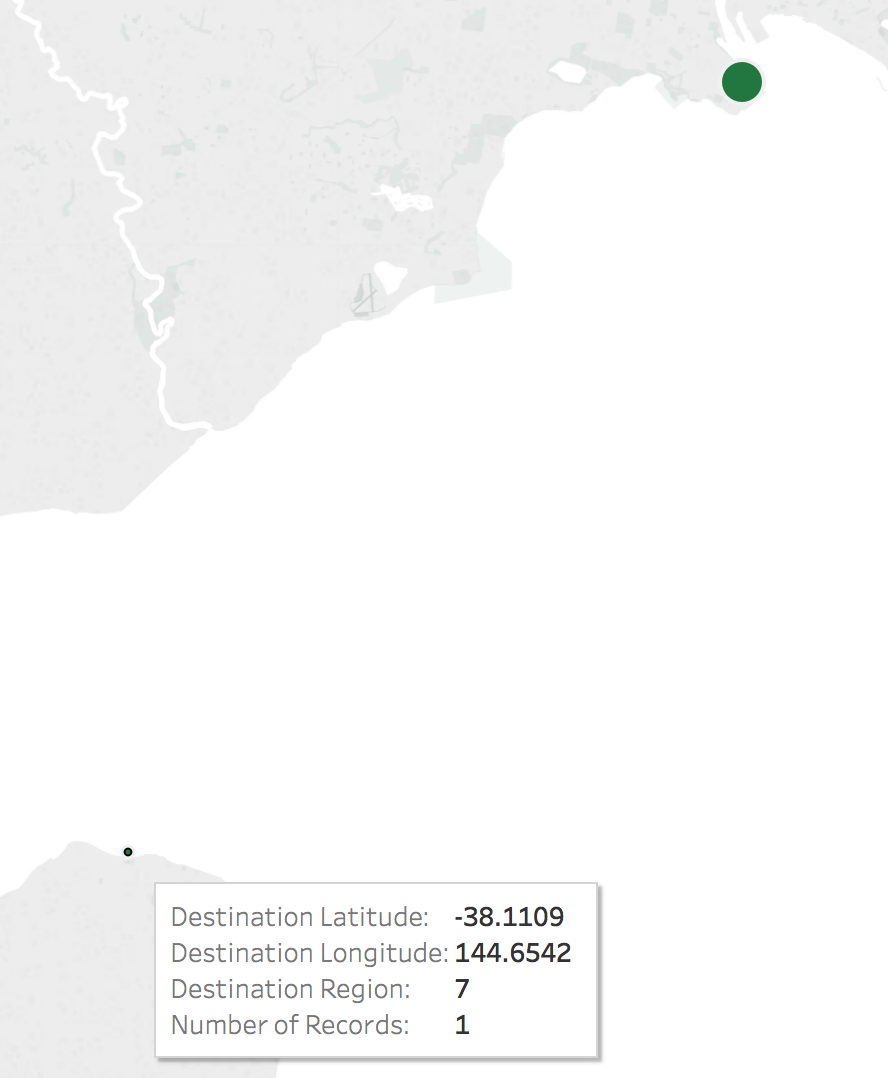

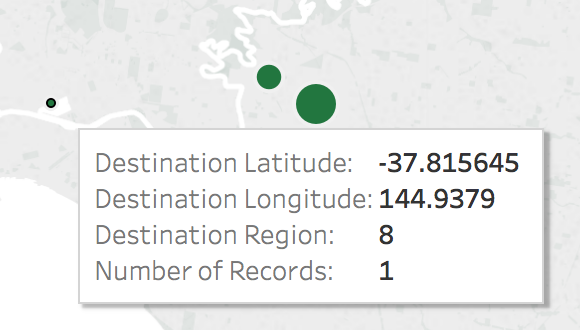

In [35]:
'''
Now fix destination error. First,find the index of error of each region,then fix the value of region
'''

#In region"3", find index of error then fix error
df_L[df_L["Destination Longitude"] < 144.94][df_L["Destination Region"] == 3]
#compare with points' range of region,then we change it to region "5"
df_L.loc[50,"Destination Region"] = 5


#Two error points in Region "4",find index of error then fix error
df_L[df['Destination Latitude'] < -37.86][df_L["Destination Region"] == 4]
df_L[df['Destination Latitude'] > -37.78][df_L["Destination Region"] == 4]
#compare with points' range of region,then we change them separately
df_L.loc[41,"Destination Region"] = 7
df_L.loc[36,"Destination Region"] = 6

#Error in Region "7" 
df[df['Destination Longitude'] < 144.7][df["Destination Region"] == 7]
df_L.loc[37,"Destination Region"] = 9

#Error in Region "8": 
df[df["Destination Longitude"] <145.0][df["Destination Region"] == 8]
df_L.loc[46,"Destination Region"] = 1

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


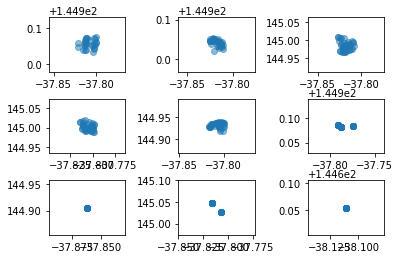

In [36]:
#See the data points again
#See each region plot
plt.figure(9)         
plt.subplot(3,3,1)
x11 = df_L['Destination Latitude'][df_L['Destination Region']== 1]
y11 = df_L['Destination Longitude'][df_L['Destination Region']== 1]
plt.scatter(x11, y11, alpha=0.5)

#plt.figure(2)
plt.subplot(3,3,2)
x21 = df_L['Destination Latitude'][df_L['Destination Region']== 2]
y21 = df_L['Destination Longitude'][df_L['Destination Region']== 2]
plt.scatter(x21, y21, alpha=0.5)


#plt.figure(3)
plt.subplot(3,3,3)
x31 = df_L['Destination Latitude'][df_L['Destination Region']== 3]
y31 = df_L['Destination Longitude'][df_L['Destination Region']== 3]
plt.scatter(x31, y31, alpha=0.5)

#plt.figure(4)
plt.subplot(3,3,4)
x41 = df_L['Destination Latitude'][df_L['Destination Region']== 4]
y41 = df_L['Destination Longitude'][df_L['Destination Region']== 4]
plt.scatter(x41, y41, alpha=0.5)

#plt.figure(5)
plt.subplot(3,3,5)
x51 = df_L['Destination Latitude'][df_L['Destination Region']== 5]
y51 = df_L['Destination Longitude'][df_L['Destination Region']== 5]
plt.scatter(x51, y51, alpha=0.5)


#plt.figure(6)
plt.subplot(3,3,6)
x61 = df_L['Destination Latitude'][df_L['Destination Region']== 6]
y61 = df_L['Destination Longitude'][df_L['Destination Region']== 6]
plt.scatter(x61, y61, alpha=0.5)


#plt.figure(7)
plt.subplot(3,3,7)
x71 = df_L['Destination Latitude'][df_L['Destination Region']== 7]
y71 = df_L['Destination Longitude'][df_L['Destination Region']== 7]
plt.scatter(x71, y71, alpha=0.5)


#plt.figure(8)
plt.subplot(3,3,8)
x81 = df_L['Destination Latitude'][df_L['Destination Region']== 8]
y81 = df_L['Destination Longitude'][df_L['Destination Region']== 8]
plt.scatter(x81, y81, alpha=0.5)


plt.subplot(3,3,9)
x91 = df_L['Destination Latitude'][df_L['Destination Region']== 9]
y91 = df_L['Destination Longitude'][df_L['Destination Region']== 9]
plt.scatter(x91, y91, alpha=0.5)

plt.subplots_adjust(wspace = 0.7, hspace = 0.5)

Now all the Destination Region seems like in one circle

In [37]:
#Copy the file to use copyone to do next step
df_R = df_L.copy()  #L is the abbreviation of step fixing Latitude and longitude

### 3.4 Check and fix error of Date and classify
* check the format of date
* classify the date to 0,1 (weekends,weekdays)

In [38]:
#define the format of data
def dateform(date):
    pattern = re.compile(r"(\d{4}[/-](((0[13578]|1[02])-(0[1-9]|[12][0-9]|3[01]))|((0[469]|11)-(0[1-9]|[12][0-9]|30))|(02-(0[1-9]|[1][0-9]|2[0-8]))))")
    if pattern.match(date):
        return True
    else:
        return False

In [39]:
#check format of departure date, find the error

validate = 0
date_index = []
for i in range(len(df_R)):
    if dateform(df_R.loc[i, "Departure Date"]):
        validate +=1
    else:
        date_index.append(i)
        print(i,df_R.loc[i, "Departure Date"])

validate
        

199 2018-20-03
200 2018-16-06
202 2018-15-06
207 2018-14-03
211 2018-19-07
217 2018-22-03
221 2018-13-03
223 2018-22-01
225 2018-28-04
228 2018-04-31
229 2018-02-30
232 2018-02-30
234 2018-02-30
238 2018-06-31
247 2018-02-30
248 2018-02-30
250 2018-04-31
255 2018-02-30
261 2018-06-31


306

In [43]:
#fix the error in date
#the error in date form are exchange the posotion of day and month, or 30,31 day on Feburary or April

for index in date_index:
    aa = df_R.loc[index, 'Departure Date'].split("-")
    aa[1]= int(aa[1])
    aa[2]= int(aa[2])
    if aa[2]== 30 or aa[2]== 31 :   #for the date of month don't have 31, we trun it to 1st of next month
        #print(aa[2],aa[1])
        aa[1]+=1
        aa[1] = "0" + str(aa[1])
        aa[2]='01'
        cc = aa[0] + "-" + aa[1] + "-" + aa[2]
        df_R.loc[index, 'Departure Date']=cc 
        
    else:

        aa[1]= str(aa[1])
        aa[2]= str(aa[2])
        bb = aa[0] + "-" +"0" + aa[2] + "-" + aa[1]
        #print(bb)
        df_R.loc[index,'Departure Date'] = bb
       
    
#check if all the date is correct
validate = 0
date_index = []
for i in range(len(df_R)):
    if dateform(df_R.loc[i, "Departure Date"]):
        validate +=1
    else:
        date_index.append(i)
        print(i,df_R.loc[i, "Departure Date"])

validate

325

* classify the date to 0,1 (weekdays,weekend)

In [44]:
#calssify date is a weekday or weekend
week_day = []
for i in range(len(df_R)):
    week = df_R.loc[i,'Departure Date']
    #print(week)
    days = datetime.strptime(week,'%Y-%m-%d').weekday()
    #days = whatday.weekday()
    
    #weekdays =0,weekends =1
    if days>= 0 and days <=4:     
        ss = 0
        week_day.append(ss)
    else:
        ss = 1
        week_day.append(ss)
    #print(ss)

week_day = pd.Series(week_day)
df_R = pd.concat([df_R, week_day], axis=1)
df_R = df_R.rename(columns={0:'Week ends_day'})

In [45]:
df_R.head(10)

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day
0,ID3185982623,1,4,3,-37.8167945,145.0073797,-37.8199344,144.9812137,2735.1,2018-02-09,23:56:58,711.00,0:08:49,19.24,0
1,ID3897046466,1,3,7,-37.8215272,145.0018593,-37.8618349,144.9057160,10725.4,2018-03-10,20:15:55,3423.54,21:12:58,29.81,1
2,ID3797586685,1,1,8,-37.8069403,144.9488771,-37.8158343,145.0464500,8791.0,2018-05-16,13:19:20,2518.50,14:01:18,20.87,0
3,ID3303585585,1,6,3,-37.7907967,144.9858650,-37.8164564,144.9790645,3277.0,2018-07-11,06:46:43,939.00,7:02:22,10.86,0
4,ID1343562486,0,2,4,-37.8135309,144.9408347,-37.7998614,144.9932054,5580.0,2018-02-21,00:23:36,1398.36,0:46:54,9.88,0
5,ID3313708594,1,8,4,-37.8158343,145.0464500,-37.8048419,144.9934812,5344.0,2018-02-14,21:36:12,1683.78,22:04:15,22.41,0
6,ID1999960119,0,7,6,-37.8618349,144.9057160,-37.7907967,144.9858650,11711.0,2018-05-23,05:55:10,3859.80,6:59:29,12.17,0
7,ID3188303691,1,8,3,-37.8158343,145.0464500,-37.8212343,144.9837377,6502.0,2018-05-26,12:38:41,1915.32,13:10:36,23.43,1
8,ID3226726876,1,4,7,-37.8048211,144.9937810,-37.8618349,144.9057160,11110.0,2018-07-05,13:09:34,3635.04,14:10:09,24.98,0
9,ID1166078821,0,5,2,-37.8051240,144.9370784,-37.8210485,144.9473608,2238.0,2018-01-18,07:06:54,581.46,7:16:35,4.33,0


In [46]:
df_D = df_R.copy()

### 3.5 Check and fix error of Journey Distance and Travel Time
* find the nodes for each data points in Origin and in Destination;
* calculate journey distance by Dijkstra algorithm and networkx package 
* at the same time calculate travel time for each journey according the speed limit in edges; 
* then correct journey distance;
* store the index of the travel time error, calculate other shorest paths' travel time for these journey to check 
  if the recorded travel time is the other shorest path time rather than the first shorest path travel time;
* for the rest of travel time error we fix them by departure time and arrival time since each row only have one error



In [47]:
'''Check whether there is error in data after fixing the format of lat and lon for Origin and Destination, 
   then add columns of nodes for Origin and Destination data points by nodes file
'''
df_D[df_D['Destination Latitude']>0]
df_D[df_D['Origin Latitude']>0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day


In [48]:
#find the nodes for Origin and Destination data points by nodes file

ori_nodes = []
dest_nodes = []
for i in range(len(df_D)):
    #ori_nodes = []
    olat = df_D.loc[i,'Origin Latitude']
    olon = df_D.loc[i,'Origin Longitude']
    
    dlat = df_D.loc[i,'Destination Latitude']
    dlon = df_D.loc[i,'Destination Longitude']
    for j in range(len(nodes)):
        if olat == nodes.loc[j,'lat'] and olon ==nodes.loc[j,'lon']:
            nod = nodes.loc[j,'Unnamed: 0']
            ori_nodes.append(nod)
        
        if dlat == nodes.loc[j,'lat'] and dlon ==nodes.loc[j,'lon']:
            nods = nodes.loc[j,'Unnamed: 0']
            dest_nodes.append(nods)
    
ori_nodes = pd.Series(ori_nodes)
df_D = pd.concat([df_D, ori_nodes], axis=1)
df_D = df_D.rename(columns={0:'Origin Nodes'})

dest_nodes = pd.Series(dest_nodes)
df_D = pd.concat([df_D, dest_nodes], axis=1)
df_D = df_D.rename(columns={0:'Destination Nodes'})

In [49]:
#see the result of frist few rows
#df_D.head(10)
df_D.tail(10)

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Origin Nodes,Destination Nodes
315,ID1884862818,0,7,9,-37.8618349,144.9057160,-38.1109156,144.6541725,50797.0,2018-07-21,07:35:39,13173.36,11:15:12,19.16,1,1390575046,5002706670
316,ID3206498201,1,5,4,-37.8094914,144.9262248,-37.7998375,144.9889029,6885.0,2018-05-21,05:53:42,1736.40,6:22:38,24.52,0,4893634392,2272190619
317,ID3828111779,1,9,4,-38.1109156,144.6541725,-37.8057117,144.9959430,46831.0,2018-04-08,00:14:15,11295.54,3:22:30,69.40,1,5002706670,583473313
318,ID3203691352,1,9,3,-38.1109156,144.6541725,-37.8269391,145.0094593,48188.0,2018-07-14,03:52:49,11592.72,7:06:01,70.99,1,5002706670,260907215
319,ID3230172294,1,2,1,-37.8187937,144.9168526,-37.8134999,144.9655868,5012.0,2018-07-10,17:56:50,1303.80,18:18:33,15.84,0,206204601,2383211220
320,ID1911520108,0,7,5,-37.8618349,144.9057160,-37.8062120,144.9353959,10701.0,2018-05-04,17:13:34,3445.26,18:10:59,7.86,0,1390575046,579999049
321,ID1276590727,0,7,2,-37.8618349,144.9057160,-37.8102505,144.9359257,10555.0,2018-07-14,17:07:47,3424.08,18:04:51,14.80,1,1390575046,560997297
322,ID1698245430,0,3,8,-37.8185851,144.9915878,-37.8158343,145.0464500,5600.0,2018-06-03,19:41:16,1702.74,20:09:38,13.23,1,4313862246,1889485053
323,ID3356058333,1,3,7,-37.8103197,144.9983089,-37.8618349,144.9057160,10890.0,2018-04-11,23:42:21,3557.22,0:41:38,31.65,0,129952492,1390575046
324,ID3500315348,1,5,3,-37.7992960,144.9354505,-37.8114235,144.9760123,4249.0,2018-06-14,13:12:19,1064.16,13:30:03,13.23,0,95559042,3146813283


In [50]:
G = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])

In [51]:
'''
Using netxorkx to get the shortest distance and short paths between data points.After that, 
calculating travel time by using the shortest distance of two nodes and speed limit for each street,
 check and fix the error in journey distance by the shorest distance of two nodes
'''

#define a function for one path of a journey
def traveltime(path):

    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)

    return tt



In [52]:
'''
Calculate the shortest diatance and the travel time of the frist shorest path in many paths at the same time,
Second, the error travel time we find in first step, we have check them with other travel time of other paths in one
journey to see if the travel time recorded in data is one of other paths travel time in the same journey 
'''
#first step function to get distance and one travel time
def pathdist_time(src,des):
    
    dis_time = {}
    ##tradtime = []
    d, p = nx.single_source_dijkstra(G,source=src, target=des,weight='distance(m)')
    short_dist = d
    path = p

    tradtime = traveltime(path)
    
    return [round(short_dist,9),round(tradtime,9)]

In [53]:
#the list of calculating result include journey distance and one path travel time to be used to find error later
dis_time = [] 
for i in range(len(df_D)):
    sr = df_D.loc[i,'Origin Nodes']
    de = df_D.loc[i,'Destination Nodes']
    
    resultts = pathdist_time(sr,de)

    dis_time.append(resultts)
    
dis_time

[[2736.0, 711.0],
 [10722.0, 3423.54],
 [8791.0, 2518.5],
 [3277.0, 939.0],
 [5580.0, 1398.6],
 [5344.0, 1683.78],
 [11711.0, 3859.8],
 [6502.0, 1915.32],
 [11110.0, 3635.04],
 [2238.0, 581.46],
 [11701.0, 3714.36],
 [8124.0, 2797.5],
 [3758.0, 962.88],
 [8830.0, 2239.02],
 [8361.0, 2438.22],
 [11008.0, 3120.54],
 [5655.0, 1360.98],
 [12407.0, 3927.96],
 [11804.0, 3797.7],
 [10569.0, 3432.24],
 [10095.0, 2842.8],
 [8995.0, 3029.64],
 [7111.0, 1906.14],
 [42874.0, 10322.34],
 [11633.0, 3663.78],
 [2100.0, 602.1],
 [6169.0, 1703.46],
 [4488.0, 1436.7],
 [11360.0, 3543.42],
 [2773.0, 738.78],
 [11712.0, 3757.26],
 [42870.0, 10274.34],
 [5789.0, 1492.68],
 [5777.0, 1548.9],
 [44332.0, 10798.62],
 [5597.0, 1705.62],
 [16033.0, 5320.68],
 [46064.0, 11066.88],
 [51032.0, 12681.06],
 [51032.0, 12681.06],
 [2012.0, 476.04],
 [11390.0, 3572.76],
 [5584.0, 1379.82],
 [7471.0, 2192.7],
 [5427.0, 1452.48],
 [11163.0, 3613.5],
 [8705.0, 2238.54],
 [6390.0, 1706.82],
 [7140.0, 1782.3],
 [46360.0, 111

In [54]:
len(dis_time)

325

In [55]:
df_T = df_D.copy()

In [56]:
#Firstly check and find error in distance and travel time and print them

print(len(dis_time))
print(len(df_T))

timerr_index = []
disterr_index = []
for i in range(len(dis_time)):
    distan = dis_time[i][0]
    caltime = dis_time[i][1]  #calculated travel time
    
    value_dist = round(df_T.loc[i,'Journey Distance(m)'],9)
    value_time = round(df_T.loc[i,'Travel Time(s)'],9)
    
    if distan == value_dist:
        pass
    if distan != value_dist:
        print("disterr",i,distan,value_dist)
        disterr_index.append(i)
    if caltime == value_time:
        pass
    if caltime != value_time:
        print("timerr",i,caltime,value_time)
        timerr_index.append(i)
        

325
325
disterr 0 2736.0 2735.1
disterr 1 10722.0 10725.4
timerr 4 1398.6 1398.36
disterr 10 11701.0 11705.7
disterr 15 11008.0 11007.6
disterr 17 12407.0 12410.4
timerr 30 3757.26 3717.48
timerr 42 1379.82 1380.12
timerr 52 1641.36 1641.48
timerr 54 1605.96 1605.72
timerr 91 3040.74 3133.74
timerr 92 1526.1 1527.86
timerr 95 10706.1 10751.1
timerr 96 2430.66 2498.66
timerr 106 1717.26 1709.26
timerr 109 313.44 315.44
timerr 113 3534.42 3611.42
timerr 120 10461.96 10472.96
timerr 123 12681.06 12701.06
timerr 124 2945.4 3018.4
timerr 127 11248.68 11248.44
timerr 201 11137.74 11133.66
timerr 206 3140.7 3143.7
timerr 288 1772.7 1768.62
timerr 299 11063.1 11059.02
timerr 309 2095.14 2068.2
timerr 313 1526.82 1526.58
timerr 316 1736.64 1736.4


In [57]:

#Second time check error travel time with calculated other paths time and find final error in travel time")   

print("Check again to find travel time error")   
  
errtime_index = []   # the index list of travel time error need to fix
correct_times = []   #other paths travel time list, so some error don't need to fix
   
for index in timerr_index:
    dict_times={}
    tradtime = []
    
    sr = df_T.loc[index,'Origin Nodes']
    de = df_T.loc[index,'Destination Nodes']
    
    
    values =round(df_R.loc[index,'Travel Time(s)'],9)
    
    paths = nx.all_shortest_paths(G,source=sr, target=de, weight='distance(m)', method='dijkstra')
    p_list = list(paths)

    if len(p_list):
        for path in p_list:
            tradtime.append(round(traveltime(path),9))  #for one journey other paths travel time

    if len(p_list) == 0:
        tradtime = 0
    
    #the travel time error don't need to fix since it can be found in other paths travel time 
    if values in tradtime:
        dict_times[str(index)]=tradtime
        correct_times.append(dict_times)
        
    #find the error we need to fix
    else:
        errtime_index.append(index)
        
        print("error need to fix",index,values)

Check again to find travel time error
error need to fix 91 3133.74
error need to fix 92 1527.86
error need to fix 95 10751.1
error need to fix 96 2498.66
error need to fix 106 1709.26
error need to fix 109 315.44
error need to fix 113 3611.42
error need to fix 120 10472.96
error need to fix 123 12701.06
error need to fix 124 3018.4


In [60]:
'''
fix journey distance and then use departure time and travel time to check which one is wrong
in travel time, departure time and arrival time
'''
disterr_index
#there are just a few  distance error as it shows above and we fix them
for index in disterr_index:
    df_T.loc[index,'Journey Distance(m)'] = dis_time[index][0]  

In [61]:
#fix the final error travel time by calculating departure time and arrival time  
for each in errtime_index:
    
    value_time = df_T.loc[each,'Travel Time(s)']
    
    dep_time = str(df_T.loc[each,'Departure Time'])
    arr_time = str(df_T.loc[each,'Arrival Time'])
    
    tt1=parser.parse(dep_time)
    tt2 =parser.parse(arr_time)
    cal_tratime = (tt2 - tt1).seconds
    
    if value_time ==cal_tratime:     #fix travel time by shortest distance and fix departure or arrival time
        print(each,value_time,cal_tratime)
    
    if value_time !=cal_tratime:
        df_T.loc[each,'Travel Time(s)']=cal_tratime
        
    else:
        print("there is error")

In [164]:
df_T2=df_T.copy()

### 3.6 Check and fix error of Time( departure time and arrival time by travel time)
Finding the error that calculated travel time is not equal to right travel time 
Also finding the error departure time later than arrival time, but some of them might be not error since arrival time in the next day, so for these data points we have calculate the departure time and arrival time and compare with travel time since we fix travel time error in last step.
For the result equal to travel time, it means that the arrival time in the next day,there is no error.
For the result not eaual to travel time, we have to swap the departure time and arrival time and then compare  calculated travel time with the original travel time, if they are same, it's position error, if not, it's the arrival time error, we have to fix original arrival time.
Classify departure time

In [166]:
'''
finding index of error deparute time later than arrival time and store in list dp_arr_error, for the point error that
calculated travel time not equal to correct travle time, we need to swap them and then check the calculated travel 
time again;
for the arrival time is late than departure time, compare calculated travel time and correct travel time
to find arrival error

'''

dp_arr_error = []
swapt_error = []
arr_error = []
for i in range(len(df_T)):
    depa_time = df_T2.loc[i,'Departure Time']
    arri_time = df_T2.loc[i,'Arrival Time']
    #travel_time = df_T.loc[i,'Travel Time(s)']
    travel_time = round(df_T2.loc[i,'Travel Time(s)'],9)
    
    time1=parser.parse(depa_time)
    time2 =parser.parse(arri_time)
    calculate_tratime = (time2 - time1).seconds
    
     
    #arrival time in next day or departure and arrival time need to swap or fix arrival error
    if depa_time > arri_time:        
        #print(i,dep_time,arr_time)
        dp_arr_error.append(i)
        if calculate_tratime == travel_time:  #arrival time in next day
            pass
        
        if travel_time !=calculate_tratime:   
            different = travel_time -calculate_tratime
            if different>0 and different <1 :    #the difference less than 1 second
                pass
            else:        # need to swap departure time and arrival time
                print("swap",i,travel_time,calculate_tratime,depa_time,arri_time)
                swapt_error.append(i)
    
    if depa_time < arri_time:      # find arrival time error 
        if calculate_tratime == travel_time:
            pass
        
        if travel_time !=calculate_tratime:
            different = travel_time -calculate_tratime
            if different>0 and different <1 :    #the difference less than 1 second
                pass
            
            else:    
                print(i,depa_time,arri_time,travel_time,calculate_tratime)
                arr_error.append(i)

127 02:37:57 6:41:08 11248.44 14591
129 10:35:21 13:21:02 1482.48 9941
130 15:15:22 16:56:41 12976.5 6079
133 01:39:57 4:43:49 5323.56 11032
134 23:19:50 2:50:19 1393.62 12629
135 06:32:00 10:45:25 4292.4 15205
136 22:25:00 3:42:52 3599.64 19072
137 23:06:23 4:50:23 1187.4 20640
138 09:15:40 12:16:00 836.52 10820
swap 141 797.64 6877 23:33:28 1:28:05
swap 170 3618.3 82782 20:02:20 19:02:02
swap 173 10431.18 75969 13:47:58 10:54:07
swap 174 839.4 85561 16:21:17 16:07:18
swap 179 1070.34 85330 16:57:51 16:40:01
swap 184 2803.08 83597 3:59:38 03:12:55
swap 186 705.3 85695 0:30:21 00:18:36
swap 188 1737.36 84663 20:35:59 20:07:02
swap 190 973.8 85427 15:58:03 15:41:50
swap 193 3533.76 82867 17:18:41 16:19:48
swap 195 4047.72 82353 22:30:59 21:23:32


In [65]:
arr_error

[127, 129, 130, 133, 134, 135, 136, 137, 138]

Now we find the error that departure time after arrival time and not equal to travel time, we have to swap them 
and compare the calculated traveltime with right travel time.
But one point in 141 row, there are two situation, 1: the journey start from 23:33:28 and arrive at 01:28:05 am in next day, or 2: the journey start from 01:28:05 am and arrive at 23:33:28. Swapping it firstly to check if it is same as travel time, if they are not same, we think it is arrival time error since if it's the error in firstly situation, we have to correct the travel time, but we fix the travel time in last step, we think the travel time are correct in follwing.

In [181]:
swapt_error

[141, 170, 173, 174, 179, 184, 186, 188, 190, 193, 195]

In [83]:
#for the data points error, departure time is late than arrival time, swap them and compare with correct travel time

swap_check = []
for index in swapt_error:
    dept_error = df_T2.loc[index,'Departure Time']
    arrl_error = df_T2.loc[index,'Arrival Time']
    
    dept_error,arrl_error = arrl_error,dept_error
        
    if dept_error > arrl_error:
        print("s",index,dept_error,arrl_error)
    if dept_error < arrl_error:
        travelstime = round(df_T2.loc[index,'Travel Time(s)'],9)
            
        tdp=parser.parse(dept_error)
        tarr =parser.parse(arrl_error)
        calcudtratime = (tarr - tdp).seconds
            
        if travelstime == calcudtratime:
            print("same",traveltime,calcudtratime)
            #pass
        if travelstime != calcudtratime:
            diffens = travelstime - calcudtratime
            if diffens>0 and diffens<1:    #the difference less than 1 second
                print("d",index,diffens,travelstime,calcudtratime)
                #pass
            else:
                print(index,dept_error,arrl_error,travelstime,calcudtratime)

141 1:28:05 23:33:28 797.64 79523
d 170 0.3000000000001819 3618.3 3618
d 173 0.18000000000029104 10431.18 10431
d 174 0.39999999999997726 839.4 839
d 179 0.33999999999991815 1070.34 1070
d 184 0.07999999999992724 2803.08 2803
d 186 0.2999999999999545 705.3 705
d 188 0.35999999999989996 1737.36 1737
d 190 0.7999999999999545 973.8 973
d 193 0.7600000000002183 3533.76 3533
d 195 0.7199999999997999 4047.72 4047


In [182]:
swapt_error.remove(141)
swapt_error

[170, 173, 174, 179, 184, 186, 188, 190, 193, 195]

In [183]:
for index in swapt_error:
    df_T2.loc[index,'Departure Time'],df_T2.loc[index,'Arrival Time']=df_T2.loc[index,'Arrival Time'],df_T2.loc[index,'Departure Time']

In [168]:
arr_error.append(141)
arr_error

[127, 129, 130, 133, 134, 135, 136, 137, 138, 141]

In [172]:
#fix all arriavl time error include 141
'''depterror = df_T2.loc[141,'Departure Time']
arrlerror = df_T2.loc[141,'Arrival Time']

td=parser.parse(depterror)
tr=parser.parse(arrlerror)
calt = (tr - td).seconds

df_T2.loc[141,'Travel Time(s)']=calt'''
import datetime
from datetime import time
for each in arr_error:
    depat_timed = df_T2.loc[each,'Departure Time']
    arriv_timed = df_T2.loc[each,'Arrival Time']
    travell_timed = df_T2.loc[each,'Travel Time(s)']
    
    tral_scon_time = datetime.timedelta(seconds=travell_timed)
    depd_time = datetime.datetime.strptime(depat_timed, '%H:%M:%S')
    
    cal_arritime = tral_scon_time + depd_time
    
    final_arrive = cal_arritime.strftime('%H:%M:%S')
    
    df_T2.loc[each,'Arrival Time'] = final_arrive
    
    print(depat_timed,arriv_timed,final_arrive)



02:37:57 6:41:08 05:45:25
10:35:21 13:21:02 11:00:03
15:15:22 16:56:41 18:51:38
01:39:57 4:43:49 03:08:40
23:19:50 2:50:19 23:43:03
06:32:00 10:45:25 07:43:32
22:25:00 3:42:52 23:24:59
23:06:23 4:50:23 23:26:10
09:15:40 12:16:00 09:29:36
23:33:28 1:28:05 23:46:45


calssify departure time

In [180]:
#classify the departure time and add one column to dataframe
class_deptime = []
for i in range(len(df_T2)):
    deptime = df_T2.loc[i,'Departure Time']
    
    if deptime > "06:00:00" and deptime < "11:59:59":
        depcla =0 
    
    elif deptime >'12:00:00' and deptime< "20:59:59":
        depcla = 1        
    
    else:
        depcla = 2
    class_deptime.append(depcla)
    
#add the list to the dataframe
class_deptime = pd.Series(class_deptime)
df_T2 = pd.concat([df_T2, class_deptime], axis=1)
df_T2 = df_T2.rename(columns={0:'Deptime Class'})

In [185]:
df_A = df_T2.copy()

### 3.7 Fix the Urber Type error

there are relationship between Uber type and ID, basicly see the record of data firstly by Urber type

In [91]:
pattern1 = re.compile("ID3\d*")  #Uber Tpye 1
pattern2 = re.compile("ID1\d*")  #Uber Type 0
pattern3 = re.compile("ID5\d*") #Uber Type 2

In [187]:
list1 = []
list2 = []
list3 = []

for i in range(len(df_A)):
    id_no = df_A.loc[i,'Unnamed: 0']
    if pattern1.match(id_no):
        list1.append([i,df_A.loc[i,'Unnamed: 0'],df_A.loc[i,'Uber Type']])
    elif pattern2.match(id_no):
        list2.append([i,df_A.loc[i,'Unnamed: 0'],df_A.loc[i,'Uber Type']])
    elif pattern3.match(id_no):
        list3.append([i,df_A.loc[i,'Unnamed: 0'],df_A.loc[i,'Uber Type']])
    else:
        print(i,df_A.loc[i,'Unnamed: 0'],df_A.loc[i,'Uber Type'])
        

In [188]:
'''By detecting, the customer IDfollow "ID3\d*" take the Uber Tpye 1 in list1, "ID1\d*" :Uber Type 0 in list2, "
ID5\d*" :Uber Type 2 in list3'''
typerr_index = []
def checktype(listn,typeno):
    for i in range(len(listn)):
        if listn[i][2] !=typeno:
            print(listn[i][0],listn[i][1],listn[i][2])
            typerr_index.append(listn[i][0])

In [189]:
#print the error of Uber Type
print(checktype(list1,1))
print(checktype(list2,0))
print(checktype(list3,2))

150 ID3468523114 3
162 ID3563080424 2
None
143 ID1649042438 1
145 ID1360792732 3
148 ID1883953971 1
167 ID1481792372 2
None
159 ID5719416185 1
165 ID5539473987 1
None


In [190]:
typerr_index

[150, 162, 143, 145, 148, 167, 159, 165]

In [191]:
#Now fix Uber Type error
for index in typerr_index:
    error = df_A.loc[index,'Unnamed: 0']
    if pattern1.match(error):
        df_A.loc[index,'Uber Type']= 1
    elif pattern2.match(error):
        df_A.loc[index,'Uber Type']= 0
    elif pattern3.match(error):
        df_A.loc[index,'Uber Type']= 2

In [192]:
#check whether we totally fix error
for i in range(len(df_A)):
    cust_id = df_A.loc[i,'Unnamed: 0']
    ub_type = df_A.loc[i,'Uber Type']
    if pattern1.match(cust_id) and ub_type == 1:
        pass
    elif pattern2.match(cust_id) and ub_type == 0:
        pass
    elif pattern3.match(cust_id) and ub_type == 2:
        pass
    else:
        print("there is still error",i,df_A.loc[i,'Unnamed: 0'],df_A.loc[i,'Uber Type'])

In [193]:
df_A.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Origin Nodes,Destination Nodes,Deptime Class
0,ID3185982623,1,4,3,-37.8167945,145.0073797,-37.8199344,144.9812137,2736.0,2018-02-09,23:56:58,711.00,0:08:49,19.24,0,5636123530,575524485,2
1,ID3897046466,1,3,7,-37.8215272,145.0018593,-37.8618349,144.9057160,10722.0,2018-03-10,20:15:55,3423.54,21:12:58,29.81,1,4909776715,1390575046,1
2,ID3797586685,1,1,8,-37.8069403,144.9488771,-37.8158343,145.0464500,8791.0,2018-05-16,13:19:20,2518.50,14:01:18,20.87,0,3204395237,1889485053,1
3,ID3303585585,1,6,3,-37.7907967,144.9858650,-37.8164564,144.9790645,3277.0,2018-07-11,06:46:43,939.00,7:02:22,10.86,0,4307007286,269327461,0
4,ID1343562486,0,2,4,-37.8135309,144.9408347,-37.7998614,144.9932054,5580.0,2018-02-21,00:23:36,1398.36,0:46:54,9.88,0,1224869102,1521014718,2


### 3.8 Output to csv

In [194]:
df_clean = df_A.drop('Week ends_day',1)
df_clean =df_clean.drop('Origin Nodes',1)
df_clean = df_clean.drop('Destination Nodes',1)
df_clean = df_clean.drop('Deptime Class',1)

In [195]:
df_clean.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3185982623,1,4,3,-37.8167945,145.0073797,-37.8199344,144.9812137,2736.0,2018-02-09,23:56:58,711.00,0:08:49,19.24
1,ID3897046466,1,3,7,-37.8215272,145.0018593,-37.8618349,144.9057160,10722.0,2018-03-10,20:15:55,3423.54,21:12:58,29.81
2,ID3797586685,1,1,8,-37.8069403,144.9488771,-37.8158343,145.0464500,8791.0,2018-05-16,13:19:20,2518.50,14:01:18,20.87
3,ID3303585585,1,6,3,-37.7907967,144.9858650,-37.8164564,144.9790645,3277.0,2018-07-11,06:46:43,939.00,7:02:22,10.86
4,ID1343562486,0,2,4,-37.8135309,144.9408347,-37.7998614,144.9932054,5580.0,2018-02-21,00:23:36,1398.36,0:46:54,9.88


In [579]:
df_clean.to_csv("task3_dirty_data_solution.csv", sep=',' ,index=False, encoding='utf-8')

## 4. Impute the missing values

* read and slip missing data 
* combine complete rows of missing file and clean data 
* Build linear model by Uber Type
* predict fare 
* predict missing Urber Type

### 4.1 Read missing data file 

In [129]:
df2=pd.read_csv("Data_file/task3_missing_value.csv")

In [130]:
df2.tail(10)

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
112,ID1963019465,0.0,3,6,-37.8193406,145.0022538,-37.7874421,144.9804091,5342.0,2018-01-20,09:34:32,1413.30,9:58:05,NaN
113,ID3177937710,1.0,5,1,-37.8116461,144.9317775,-37.8082105,144.9345625,1344.0,2018-07-16,18:37:25,390.36,18:43:55,12.21
114,ID1874610315,0.0,4,1,-37.8110237,145.0054885,-37.8105600,144.9642987,3787.0,2018-06-03,19:13:08,964.20,19:29:12,NaN
115,ID3716706888,1.0,3,2,-37.8098006,144.9928419,-37.8209667,144.9277688,6547.0,2018-01-16,22:41:15,1764.06,23:10:39,23.93
116,ID5627951695,2.0,2,6,-37.8150687,144.9354143,-37.7874325,144.9803767,6088.0,2018-06-03,07:35:18,1532.40,8:00:50,146.65
117,ID5410147398,2.0,3,8,-37.8175238,144.9683659,-37.8072020,145.0266373,6628.0,2018-05-26,12:53:46,1647.96,13:21:13,167.91
118,ID3740679902,1.0,8,2,-37.8158343,145.0464500,-37.8204843,144.9506099,9065.0,2018-02-01,18:38:53,2616.72,19:22:29,24.11
119,ID5327905864,2.0,9,4,-38.1109156,144.6541725,-37.8076743,144.9919535,46355.0,2018-02-18,17:26:10,11183.76,20:32:33,973.50
120,ID1347091609,0.0,7,2,-37.8618349,144.9057160,-37.8185703,144.9470836,9200.0,2018-02-21,09:21:49,3136.44,10:14:05,7.16
121,ID1446534733,0.0,4,3,-37.8044473,145.0001067,-37.8191600,144.9847744,3134.0,2018-05-23,17:24:45,810.00,17:38:15,9.14


In [131]:
#classify weekday or weekend

from datetime import datetime
miss_week_day = []
for i in range(len(df2)):
    wday = df2.loc[i,'Departure Date']
    #print(week)
    wdays = datetime.strptime(wday,'%Y-%m-%d').weekday()
    #days = whatday.weekday()
    
    #weekdays =0,weekends =1
    if wdays>= 0 and wdays <=4:     
        cd = 0
        miss_week_day.append(cd)
    else:
        cd = 1
        miss_week_day.append(cd)
    #print(ss)

miss_week_day = pd.Series(miss_week_day)
df2 = pd.concat([df2, miss_week_day], axis=1)
df2 = df2.rename(columns={0:'Week ends_day'})



In [132]:
#classify departure time
miss_class_deptime = []
for i in range(len(df2)):
    miss_deptime = df2.loc[i,'Departure Time']
    
    if miss_deptime > "06:00:00" and miss_deptime < "11:59:59":
        miss_depcla =0 
    
    elif miss_deptime >'12:00:00' and miss_deptime < "20:59:59":
        miss_depcla = 1        
    
    else:
        miss_depcla = 2
    miss_class_deptime.append(miss_depcla)
    
#add the list to the missing value dataframe
miss_class_deptime = pd.Series(miss_class_deptime)
df2 = pd.concat([df2, miss_class_deptime], axis=1)
df2 = df2.rename(columns={0:'Deptime Class'})

In [343]:
df2_miss = df2[pd.isnull(df2["Fare$"])]  #dataframe has all missing fare
miss_index=[]
for i in range(len(df2)):
    fare_value =df2.loc[i,'Fare$']
    if pd.isnull(fare_value) :
        miss_index.append(i)

In [134]:
miss_index_u0 = []
miss_index_u1 = []
miss_index_u2 = []

for each in miss_index:
    if df2_miss.loc[each,'Uber Type'] ==0:
        miss_index_u0.append(each)
    elif df2_miss.loc[each,'Uber Type'] ==1:
        miss_index_u1.append(each)
    elif df2_miss.loc[each,'Uber Type'] ==2:
        miss_index_u2.append(each)

In [135]:
print(len(miss_index_u0))
print(len(miss_index_u1))
print(len(miss_index_u2))

8
6
2


In [350]:
len(miss_index)

16

### 4.2 Combine cleaning data and complete missing data and build model to predict fare

In [197]:
#extract data without missing fare and them combine
df2_comp = df2[pd.isnull(df2["Fare$"])== False]
mix_df = pd.concat([df_A,df2_comp])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [198]:
mix_df.tail(10)

,Arrival Time,Departure Date,Departure Time,Deptime Class,Destination Latitude,Destination Longitude,Destination Nodes,Destination Region,Fare$,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Nodes,Origin Region,Travel Time(s),Uber Type,Unnamed: 0,Week ends_day
109,13:43:46,2018-05-16,13:26:09,1,-37.8140839,144.9445116,NaN,2,15.53,4386.0,-37.7917738,144.9359401,NaN,5,1057.14,1.0,ID3678105780,0
111,7:21:56,2018-07-28,06:20:19,0,-37.8618349,144.9057160,NaN,7,26.78,11630.0,-37.7874421,144.9804091,NaN,6,3697.02,1.0,ID3738709678,1
113,18:43:55,2018-07-16,18:37:25,1,-37.8082105,144.9345625,NaN,1,12.21,1344.0,-37.8116461,144.9317775,NaN,5,390.36,1.0,ID3177937710,0
115,23:10:39,2018-01-16,22:41:15,2,-37.8209667,144.9277688,NaN,2,23.93,6547.0,-37.8098006,144.9928419,NaN,3,1764.06,1.0,ID3716706888,0
116,8:00:50,2018-06-03,07:35:18,0,-37.7874325,144.9803767,NaN,6,146.65,6088.0,-37.8150687,144.9354143,NaN,2,1532.40,2.0,ID5627951695,1
117,13:21:13,2018-05-26,12:53:46,1,-37.8072020,145.0266373,NaN,8,167.91,6628.0,-37.8175238,144.9683659,NaN,3,1647.96,2.0,ID5410147398,1
118,19:22:29,2018-02-01,18:38:53,1,-37.8204843,144.9506099,NaN,2,24.11,9065.0,-37.8158343,145.0464500,NaN,8,2616.72,1.0,ID3740679902,0
119,20:32:33,2018-02-18,17:26:10,1,-37.8076743,144.9919535,NaN,4,973.50,46355.0,-38.1109156,144.6541725,NaN,9,11183.76,2.0,ID5327905864,1
120,10:14:05,2018-02-21,09:21:49,0,-37.8185703,144.9470836,NaN,2,7.16,9200.0,-37.8618349,144.9057160,NaN,7,3136.44,0.0,ID1347091609,0
121,17:38:15,2018-05-23,17:24:45,1,-37.8191600,144.9847744,NaN,3,9.14,3134.0,-37.8044473,145.0001067,NaN,4,810.00,0.0,ID1446534733,0


In [199]:
#slipt training data
df_u0 = mix_df[mix_df['Uber Type']==0]
df_u1 = mix_df[mix_df['Uber Type']==1]
df_u2 = mix_df[mix_df['Uber Type']==2]

In [300]:
#y_predict
df2_miss_u0 = df2_miss[df2_miss['Uber Type']==0]
df2_miss_u1 = df2_miss[df2_miss['Uber Type']==1]
df2_miss_u2 = df2_miss[df2_miss['Uber Type']==2]

In [323]:
#df_u0

In [324]:
#df2_miss_u0

#### Urber Type 0

In [200]:
print(df_u0.corr()["Fare$"])

Deptime Class            0.412030322
Destination Latitude    -0.472423494
Destination Longitude   -0.397212823
Destination Nodes        0.249613669
Destination Region       0.397664261
Fare$                    1.000000000
Journey Distance(m)      0.683021944
Origin Latitude         -0.400994442
Origin Longitude        -0.368163732
Origin Nodes             0.099450046
Origin Region            0.293534045
Travel Time(s)           0.678367922
Uber Type                        NaN
Week ends_day            0.375563188
Name: Fare$, dtype: float64


We can see that the "Journey Distance(m)","Travel Time(s)","Week ends_day" and "Deptime Class" have strong relationship with fare, which is coincide with assignment, so we choose them to build linear model

In [306]:
#miss_y0

In [301]:
#cross validation
u0_Xtrain, u0_Xtest, u0_ytrain, u0_ytest = train_test_split(df_u0[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']],df_u0.iloc[:,8:9],random_state=1)

In [302]:
#build model
lm_fare0 =  LinearRegression()

In [303]:
#train
lm_fare0.fit(u0_Xtrain,u0_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [320]:
print ('r-squared for this model = ',lm_fare0.score(u0_Xtest,u0_ytest))

r-squared for this model =  0.8784219371371917


In [304]:
#predict
df2_miss_u0['Predict Fare'] = lm_fare0.predict(df2_miss_u0[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [305]:
df2_miss_u0

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Deptime Class,Predict Fare
63,ID1854108599,0.0,4,2,-37.8124520,145.0122352,-37.8149849,144.9275901,9052.0,2018-04-23,13:36:11,2298.18,14:14:29,NaN,0,1,8.900648502
71,ID1557183687,0.0,7,8,-37.8618349,144.9057160,-37.8158343,145.0464500,15151.0,2018-06-11,15:31:21,4911.60,16:53:12,NaN,0,1,11.040633052
84,ID1422762734,0.0,8,6,-37.8072020,145.0266373,-37.7874325,144.9803767,5793.0,2018-06-11,00:40:03,1493.52,1:04:56,NaN,0,2,11.532727390
105,ID1497962817,0.0,2,1,-37.8249606,144.9495295,-37.7999286,144.9605564,3724.0,2018-02-13,16:06:52,964.86,16:22:56,NaN,0,1,7.714474394
106,ID1580570758,0.0,9,1,-38.1109156,144.6541725,-37.8022873,144.9572679,44077.0,2018-02-19,01:44:36,10694.70,4:42:50,NaN,0,2,19.783011952
110,ID1789447452,0.0,9,8,-38.1109156,144.6541725,-37.8158343,145.0464500,51032.0,2018-06-13,05:16:51,12681.06,8:48:12,NaN,0,2,21.508310208
112,ID1963019465,0.0,3,6,-37.8193406,145.0022538,-37.7874421,144.9804091,5342.0,2018-01-20,09:34:32,1413.30,9:58:05,NaN,1,0,9.311660017
114,ID1874610315,0.0,4,1,-37.8110237,145.0054885,-37.8105600,144.9642987,3787.0,2018-06-03,19:13:08,964.20,19:29:12,NaN,1,1,12.272118723


#### Urber Type 1

In [307]:
print(df_u1.corr()["Fare$"])

Deptime Class            0.132786060
Destination Latitude    -0.610973194
Destination Longitude   -0.553472248
Destination Nodes        0.293726938
Destination Region       0.431210250
Fare$                    1.000000000
Journey Distance(m)      0.967691899
Origin Latitude         -0.619341267
Origin Longitude        -0.590472317
Origin Nodes             0.367253062
Origin Region            0.354032968
Travel Time(s)           0.971990715
Uber Type                        NaN
Week ends_day            0.177389877
Name: Fare$, dtype: float64


In [309]:
#cross validation
u1_xtrain, u1_xtest, u1_ytrain, u1_ytest = train_test_split(df_u1[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']],df_u1.iloc[:,8:9],random_state=1)

In [310]:
#build linear model for Uber type 1
lm_fare1 =  LinearRegression()

In [311]:
#train 
lm_fare1.fit(u1_xtrain,u1_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [321]:
print ('r-squared for this model = ',lm_fare1.score(u1_xtest,u1_ytest))

r-squared for this model =  0.9938602592648937


In [312]:
#predict
df2_miss_u1['Predict Fare'] = lm_fare1.predict(df2_miss_u1[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [313]:
df2_miss_u1.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Deptime Class,Predict Fare
66,ID3550210246,1.0,1,3,-37.8161910,144.9722489,-37.8264328,144.9978078,2677.0,2018-04-27,14:44:15,639.12,14:54:54,NaN,0,1,13.153194777
70,ID3194976859,1.0,4,1,-37.8004569,144.9975411,-37.8057420,144.9552312,4502.0,2018-07-01,02:54:50,1159.32,3:14:09,NaN,1,2,24.961525501
91,ID3824833903,1.0,1,4,-37.8160448,144.9651252,-37.8014874,145.0113850,5122.0,2018-02-27,06:42:02,1384.92,7:05:06,NaN,0,0,11.299520349
99,ID3459317746,1.0,8,2,-37.8158343,145.0464500,-37.8132882,144.9404088,9695.0,2018-03-02,05:23:56,2716.98,6:09:12,NaN,0,2,27.781067180
100,ID3828039106,1.0,5,9,-37.8157575,144.9284569,-38.1109156,144.6541725,44240.0,2018-07-27,16:38:12,10637.46,19:35:29,NaN,0,1,58.909949988


#### Urber Type 2

In [314]:
print(df_u2.corr()["Fare$"])

Deptime Class            0.004427360
Destination Latitude    -0.737486888
Destination Longitude   -0.686383861
Destination Nodes        0.341203962
Destination Region       0.483737905
Fare$                    1.000000000
Journey Distance(m)      0.968498344
Origin Latitude         -0.496229491
Origin Longitude        -0.392130942
Origin Nodes             0.241375612
Origin Region            0.201745540
Travel Time(s)           0.970760775
Uber Type                        NaN
Week ends_day            0.006350415
Name: Fare$, dtype: float64


In [315]:
#cross validation
u2_xtrain, u2_xtest, u2_ytrain, u2_ytest = train_test_split(df_u2[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']],df_u2.iloc[:,8:9],random_state=1)

In [316]:
#build linear model
lm_fare2 =  LinearRegression()

In [317]:
#training
lm_fare2.fit(u2_xtrain,u2_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [322]:
print ('r-squared for this model = ',lm_fare2.score(u2_xtest,u2_ytest))

r-squared for this model =  0.9304235949207637


In [318]:
#perdict
df2_miss_u2['Predict Fare'] = lm_fare2.predict(df2_miss_u2[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [319]:
df2_miss_u2.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Deptime Class,Predict Fare
73,ID5153884405,2.0,6,4,-37.7874325,144.9803767,-37.8028165,145.0094388,4186.0,2018-04-23,20:19:30,1074.42,20:37:24,NaN,0,1,90.737468657
89,ID5982724233,2.0,6,1,-37.7874325,144.9803767,-37.8179800,144.9668347,4015.0,2018-04-21,04:31:02,975.96,4:47:17,NaN,1,2,101.265205275


In [352]:
#impute missing values
miss_index_u0
miss_index_u1
miss_index_u2

for indexs in miss_index:
    if df2.loc[indexs,'Uber Type'] == 0:
        df2.loc[indexs,'Fare$']=df2_miss_u0.loc[indexs,'Predict Fare']
    
    if df2.loc[indexs,'Uber Type'] == 1:
        df2.loc[indexs,'Fare$']=df2_miss_u1.loc[indexs,'Predict Fare']
        
    if df2.loc[indexs,'Uber Type'] == 2:
        df2.loc[indexs,'Fare$']=df2_miss_u2.loc[indexs,'Predict Fare']

In [351]:
miss_index

[66, 70, 73, 89, 91, 99, 100, 102, 63, 71, 84, 105, 106, 110, 112, 114]

In [353]:
df2[df2['Fare$'].isnull()]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Deptime Class


### 4.3 impute missing Uber Type

Since there are some relationship between Uber Type and customer ID, using customer ID predict missing Uber Type and the customer ID with Uber type patterns in dairty file

In [355]:
#Since there are some relationship between Uber Type and customer ID, using customer ID predict missing Uber Type
df2_type_miss = df2[pd.isnull(df2["Uber Type"])]
miss_type_index=[]
for i in range(len(df2)):
    type_value =df2.loc[i,'Uber Type']
    if pd.isnull(type_value) :
        miss_type_index.append(i)

In [356]:
miss_type_index

[1, 8, 9, 10, 13, 20, 21, 25, 29, 35, 39, 40, 41, 44, 48, 49, 51, 54]

In [ ]:
pattern1 = re.compile("ID3\d*")  #Uber Tpye 1
pattern2 = re.compile("ID1\d*")  #Uber Type 0
pattern3 = re.compile("ID5\d*") #Uber Type 2

In [357]:
for indexs in miss_type_index:
    custm_id = df2.loc[indexs,'Unnamed: 0']
    if pattern2.match(custm_id):
        #print(indexs)
        df2.loc[indexs,'Uber Type']= 0
        #print(df2_type.loc[indexs,'Uber Type'])
    elif pattern1.match(custm_id):
        df2.loc[indexs,'Uber Type']= 1
        
    elif pattern3.match(custm_id):
        df2.loc[indexs,'Uber Type']= 2

In [358]:
#check whether whether we impute 
for i in range(len(df2)):
    custms_id = df2.loc[i,'Unnamed: 0']
    uber_types = df2.loc[i,'Uber Type']
    if pattern1.match(custms_id) and uber_types == 1:
        pass
    elif pattern2.match(custms_id) and uber_types == 0:
        pass
    elif pattern3.match(custms_id) and uber_types == 2:
        pass
    else:
        print("there is still error",i,df2_type.loc[i,'Unnamed: 0'],df2_type.loc[i,'Uber Type'])

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Deptime Class
0,ID1320769642,0.0,2,7,-37.8159777,144.9383006,-37.8618349,144.9057160,10348.0,2018-04-02,06:11:47,3391.20,7:08:18,8.19,0,0
1,ID5176560581,2.0,9,3,-38.1109156,144.6541725,-37.8166176,144.9838127,45331.0,2018-05-04,20:06:43,10978.50,23:09:41,949.45,0,1
2,ID1435629114,0.0,9,8,-38.1109156,144.6541725,-37.8158343,145.0464500,51032.0,2018-03-12,17:26:32,12681.06,20:57:53,23.13,0,1
3,ID1954502097,0.0,3,1,-37.8254892,144.9846326,-37.8132241,144.9586233,3204.0,2018-07-02,10:59:25,828.66,11:13:13,3.49,0,0
4,ID3361123539,1.0,9,6,-38.1109156,144.6541725,-37.7907967,144.9858650,47193.0,2018-02-23,21:17:10,11535.78,0:29:25,71.10,0,2


### 4.4 Output to csv

In [578]:
df2_clean = df2.drop('Week ends_day',1)
df2_clean = df2_clean.drop('Deptime Class',1)
#df2_clean

In [577]:
df2_clean.to_csv("task3_missing_value_solution.csv",sep=',' ,index=False, encoding='utf-8')

## 5. Detect and remove outliers
* combine cleaning data and imputing data as train data set
* calculate the residual between fare predict and real value; std of traing data set
* calculate the residual between fare predict and real value of outlier file
* Using 3std as range to find oulier

### 5.1 Read file and classify departure time and date

In [389]:
df3 = pd.read_csv("Data_file/task3_outliers.csv")

In [390]:
#calssify date is a weekday or weekend
from datetime import datetime
import time
df3_week_day = []
for i in range(len(df3)):
    dpday= df3.loc[i,'Departure Date']
    #print(week)
    dpdays = datetime.strptime(dpday,'%Y-%m-%d').weekday()
    
    #weekdays =0,weekends =1
    if dpdays>= 0 and dpdays <=4:     
        cla_dp = 0
        df3_week_day.append(cla_dp)
    else:
        cla_dp = 1
        df3_week_day.append(cla_dp)
    #print(ss)

df3_week_day = pd.Series(df3_week_day)
df3 = pd.concat([df3, df3_week_day], axis=1)
df3 = df3.rename(columns={0:'Week ends_day'}) 

In [391]:
#classify departure time
df3_class_deptime = []
for i in range(len(df3)):
    out_deptime = df3.loc[i,'Departure Time']
    
    if out_deptime > "06:00:00" and out_deptime < "11:59:59":
        out_depcla =0 
    
    elif out_deptime >'12:00:00' and out_deptime < "20:59:59":
        out_depcla = 1        
    
    else:
        out_depcla = 2
    df3_class_deptime.append(out_depcla)
    
#add the list to the missing value dataframe
df3_class_deptime = pd.Series(df3_class_deptime)
df3 = pd.concat([df3, df3_class_deptime], axis=1)
df3 = df3.rename(columns={0:'Deptime Class'})

In [392]:
df3.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Deptime Class
0,0,ID5279161602,2,2,7,-37.8133334,144.9375814,-37.8618349,144.9057160,10564.0,2018-03-11,23:02:44,3436.32,0:00:00,188.525,1,2
1,1,ID3357826312,1,2,9,-37.8219186,144.9375504,-38.1109156,144.6541725,43090.0,2018-07-23,12:37:14,10357.80,15:29:51,56.460,0,1
2,2,ID1913266298,0,2,9,-37.8208139,144.9480607,-38.1109156,144.6541725,41916.0,2018-01-13,04:23:22,10074.66,7:11:16,32.280,1,2
3,3,ID3924722026,1,1,5,-37.8127610,144.9720093,-37.8031018,144.9291818,4427.0,2018-04-27,11:56:29,1135.02,12:15:24,8.130,0,0
4,4,ID1667028832,0,7,3,-37.8618349,144.9057160,-37.8231366,144.9783733,8288.0,2018-04-07,04:31:19,2801.52,5:18:00,9.400,1,2


### 5.2 Combine cleaning imputing data set

In [394]:
#combine cleaning data and complete dataset
mix2_df = pd.concat([df_A,df3])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [395]:
len(mix2_df)

446

In [376]:
mix2_df.head()

,Arrival Time,Departure Date,Departure Time,Deptime Class,Destination Latitude,Destination Longitude,Destination Nodes,Destination Region,Fare$,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Nodes,Origin Region,Travel Time(s),Uber Type,Unnamed: 0,Unnamed: 0.1,Week ends_day,Week_ends_day
0,0:08:49,2018-02-09,23:56:58,2,-37.8199344,144.9812137,575524485.0,3,19.24,2736.0,-37.8167945,145.0073797,5636123530.0,4,711.00,1,ID3185982623,NaN,0.0,NaN
1,21:12:58,2018-03-10,20:15:55,1,-37.8618349,144.9057160,1390575046.0,7,29.81,10722.0,-37.8215272,145.0018593,4909776715.0,3,3423.54,1,ID3897046466,NaN,1.0,NaN
2,14:01:18,2018-05-16,13:19:20,1,-37.8158343,145.0464500,1889485053.0,8,20.87,8791.0,-37.8069403,144.9488771,3204395237.0,1,2518.50,1,ID3797586685,NaN,0.0,NaN
3,7:02:22,2018-07-11,06:46:43,0,-37.8164564,144.9790645,269327461.0,3,10.86,3277.0,-37.7907967,144.9858650,4307007286.0,6,939.00,1,ID3303585585,NaN,0.0,NaN
4,0:46:54,2018-02-21,00:23:36,2,-37.7998614,144.9932054,1521014718.0,4,9.88,5580.0,-37.8135309,144.9408347,1224869102.0,2,1398.36,0,ID1343562486,NaN,0.0,NaN


### 5.3 Build linear model for fare by Urber Type

build model for traning data to calculate mean and 3std for 3 Uber type model, then find outlier

In [434]:
#slpilt trainging data
mix2_df_u0 = mix2_df[mix2_df['Uber Type']==0]
mix2_df_u1 = mix2_df[mix2_df['Uber Type']==1]
mix2_df_u2 = mix2_df[mix2_df['Uber Type']==2]

In [435]:
#split outlier data
df3_out_u0 = df3[df3['Uber Type']==0]
df3_out_u1 = df3[df3['Uber Type']==1]
df3_out_u2 = df3[df3['Uber Type']==2]

#### 5.3.1 Uber Type 0

build  training model

In [436]:
#cross validation
xtrain_u0, xtest_u0, ytrain_u0, ytest_u0 = train_test_split(mix2_df_u0[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']],mix2_df_u0.iloc[:,8:9],random_state=1)

In [437]:
#build linear model
lm_fare_u0 =  LinearRegression()

In [438]:
#training
lm_fare_u0.fit(xtrain_u0,ytrain_u0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [439]:
print ('r-squared for this model = ',lm_fare_u0.score(xtest_u0,ytest_u0))

r-squared for this model =  0.780967861346056


In [440]:
#get prediction of training data
mix2_df_u0['Predict Fare'] = lm_fare_u0.predict(mix2_df_u0[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [441]:
mix2_df_u0['Residual']=mix2_df_u0['Predict Fare']-mix2_df_u0['Fare$']

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [442]:
mix2_df_u0.head()

,Arrival Time,Departure Date,Departure Time,Deptime Class,Destination Latitude,Destination Longitude,Destination Nodes,Destination Region,Fare$,Journey Distance(m),...,Origin Longitude,Origin Nodes,Origin Region,Travel Time(s),Uber Type,Unnamed: 0,Unnamed: 0.1,Week ends_day,Predict Fare,Residual
4,0:46:54,2018-02-21,00:23:36,2,-37.7998614,144.9932054,1521014718.0,4,9.88,5580.0,...,144.9408347,1224869102.0,2,1398.36,0,ID1343562486,NaN,0,11.559453620,1.679453620
6,6:59:29,2018-05-23,05:55:10,2,-37.7907967,144.9858650,4307007286.0,6,12.17,11711.0,...,144.9057160,1390575046.0,7,3859.80,0,ID1999960119,NaN,0,13.680734090,1.510734090
9,7:16:35,2018-01-18,07:06:54,0,-37.8210485,144.9473608,844462098.0,2,4.33,2238.0,...,144.9370784,3555805908.0,5,581.46,0,ID1166078821,NaN,0,4.091488403,-0.238511597
10,12:37:39,2018-01-26,11:35:45,0,-37.8618349,144.9057160,1390575046.0,7,7.35,11701.0,...,144.9230676,4754129530.0,5,3714.36,0,ID1862791431,NaN,0,7.014417641,-0.335582359
11,12:56:18,2018-01-19,12:09:41,1,-37.8618349,144.9057160,1390575046.0,7,7.84,8124.0,...,144.9737127,2992212332.0,3,2797.50,0,ID1729624308,NaN,0,9.344646789,1.504646789


In [458]:
mix2_df_u0.describe()

,Deptime Class,Destination Latitude,Destination Longitude,Destination Nodes,Destination Region,Fare$,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Nodes,Origin Region,Travel Time(s),Uber Type,Week ends_day,Predict Fare,Residual
count,217.000000000,217.000000000,217.000000000,1.600000000e+02,217.000000000,217.000000000,217.000000000,217.000000000,217.000000000,1.600000000e+02,217.000000000,217.000000000,217.0,217.000000000,217.000000000,217.000000000
mean,1.078341014,-37.860274567,144.917060934,2.272811293e+09,5.142857143,12.683202765,16490.368663594,-37.839543026,144.940578846,2.170245376e+09,4.847926267,4286.234377880,0.0,0.244239631,12.553956276,-0.129246489
std,0.804121912,0.110010268,0.119389370,1.887263247e+09,2.626936172,6.112184931,17104.496183117,0.082064765,0.092682883,1.773526524e+09,2.486986097,4132.186250488,0.0,0.430628844,5.232990688,2.976302140
min,0.000000000,-38.110915600,144.654172500,6.008841200e+07,1.000000000,2.020000000,1091.000000000,-38.110915600,144.654172500,3.094790300e+07,1.000000000,276.360000000,0.0,0.000000000,3.777019908,-11.026358677
25%,0.000000000,-37.861834900,144.905716000,6.372282798e+08,3.000000000,8.380000000,4991.000000000,-37.824033500,144.927725100,5.817301302e+08,3.000000000,1338.480000000,0.0,0.000000000,8.213726002,-1.122512985
50%,1.000000000,-37.814852200,144.945809400,1.577390988e+09,5.000000000,11.770000000,8692.000000000,-37.814919800,144.956336300,1.390575046e+09,5.000000000,2744.700000000,0.0,0.000000000,11.723702214,0.166682160
75%,2.000000000,-37.805090400,144.985865000,4.289682952e+09,7.000000000,15.580000000,13986.000000000,-37.807070600,144.991587800,3.434995504e+09,7.000000000,4298.280000000,0.0,0.000000000,15.904024563,1.648267552
max,2.000000000,-37.773802600,145.046450000,6.245726936e+09,9.000000000,36.590000000,51061.000000000,-37.773802600,145.046450000,6.209089617e+09,9.000000000,13204.980000000,0.0,1.000000000,26.759472387,7.530660928


#### threshold for Uber Type 0

In [607]:
train_fare_mean_u0 = np.mean(mix2_df_u0['Residual'])
train_fare_mean_u0

-0.1292464891742356

In [528]:
#threshold
thre_u0 =np.std(mix2_df_u0['Residual'])
thre_u0

2.9694363816123825

In [503]:
lower_thre_u0 = train_fare_mean_u0 - 3*thre_u0
lower_thre_u0

-9.037555634011383

In [504]:
higher_thre_u0 = train_fare_mean_u0 + 3*thre_u0
higher_thre_u0

8.779062655662912

#### get prediction for fare 

In [535]:
#use the train model we build above of Ytpe 0

df3_out_u0['Predict Fare'] = lm_fare_u0.predict(df3_out_u0[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']])

In [536]:
df3_out_u0['Residual']=df3_out_u0['Predict Fare']-df3_out_u0['Fare$']

##### find outlier within mean_+ 3std

In [537]:
df3_out_u0 = df3_out_u0[(df3_out_u0['Residual']< lower_thre_u0) | (df3_out_u0['Residual'] > higher_thre_u0) ]

In [538]:
df3_out_u0

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Deptime Class,Predict Fare,Residual
5,5,ID1273266687,0,7,9,-37.8618349,144.9057160,-38.1109156,144.6541725,50797.0,2018-01-08,07:08:32,13173.36,10:48:05,28.28,0,0,17.253641323,-11.026358677
31,31,ID1233225930,0,9,7,-38.1109156,144.6541725,-37.8618349,144.9057160,50797.0,2018-01-15,11:27:11,13204.98,15:07:15,27.20,0,0,17.270309011,-9.929690989
42,42,ID1816612984,0,4,9,-37.8148877,145.0076372,-38.1109156,144.6541725,47725.0,2018-04-10,08:54:52,11473.02,12:06:05,25.08,0,0,15.944579338,-9.135420662
49,49,ID1145272241,0,4,9,-37.8117936,145.0084160,-38.1109156,144.6541725,47640.0,2018-01-22,07:21:40,11441.28,10:32:21,25.82,0,0,15.916427336,-9.903572664
74,74,ID1680082185,0,6,9,-37.7907967,144.9858650,-38.1109156,144.6541725,47193.0,2018-03-03,04:30:02,11530.62,7:42:12,36.59,1,2,26.759472387,-9.830527613


In [550]:
#collect the index of outlier
outlier_index = []
for i,v in enumerate(df3_out_u0['Unnamed: 0']):
    outlier_index.append(v)

In [551]:
outlier_index

[5, 31, 42, 49, 74]

#### 5.3.2 Uber Type 1

build model

In [443]:
#cross validation
xtrain_u1, xtest_u1, ytrain_u1, ytest_u1 = train_test_split(mix2_df_u1[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']],mix2_df_u1.iloc[:,8:9],random_state=1)

In [444]:
#buil linear model
lm_fare_u1 =  LinearRegression()

In [445]:
#training
lm_fare_u1.fit(xtrain_u1,ytrain_u1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [446]:
print ('r-squared for this model = ',lm_fare_u1.score(xtest_u1,ytest_u1))

r-squared for this model =  0.9911882964406169


In [447]:
#predict
mix2_df_u1['Predict Fare'] = lm_fare_u1.predict(mix2_df_u1[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [448]:
#calculate the residual and add to dataframe
mix2_df_u1['Residual']=mix2_df_u1['Predict Fare']-mix2_df_u1['Fare$']

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [449]:
mix2_df_u1.head()

,Arrival Time,Departure Date,Departure Time,Deptime Class,Destination Latitude,Destination Longitude,Destination Nodes,Destination Region,Fare$,Journey Distance(m),...,Origin Longitude,Origin Nodes,Origin Region,Travel Time(s),Uber Type,Unnamed: 0,Unnamed: 0.1,Week ends_day,Predict Fare,Residual
0,0:08:49,2018-02-09,23:56:58,2,-37.8199344,144.9812137,575524485.0,3,19.24,2736.0,...,145.0073797,5636123530.0,4,711.00,1,ID3185982623,NaN,0,18.466573708,-0.773426292
1,21:12:58,2018-03-10,20:15:55,1,-37.8618349,144.9057160,1390575046.0,7,29.81,10722.0,...,145.0018593,4909776715.0,3,3423.54,1,ID3897046466,NaN,1,28.384521115,-1.425478885
2,14:01:18,2018-05-16,13:19:20,1,-37.8158343,145.0464500,1889485053.0,8,20.87,8791.0,...,144.9488771,3204395237.0,1,2518.50,1,ID3797586685,NaN,0,20.169951356,-0.700048644
3,7:02:22,2018-07-11,06:46:43,0,-37.8164564,144.9790645,269327461.0,3,10.86,3277.0,...,144.9858650,4307007286.0,6,939.00,1,ID3303585585,NaN,0,8.366164039,-2.493835961
5,22:04:15,2018-02-14,21:36:12,2,-37.8048419,144.9934812,2755217877.0,4,22.41,5344.0,...,145.0464500,1889485053.0,8,1683.78,1,ID3313708594,NaN,0,22.004737157,-0.405262843


#### threshold for Uber Type 1

In [524]:
train_fare_mean_u1 = np.mean(mix2_df_u1['Residual'])
train_fare_mean_u1

-0.2430617707073447

In [525]:
#threshold
thre_u1 =np.std(mix2_df_u1['Residual'])
thre_u1

4.054060115100354

In [526]:
higher_thre_u1 = train_fare_mean_u1 + 3*thre_u1
higher_thre_u1

11.919118574593718

In [527]:
lower_thre_u1 = train_fare_mean_u1 - 3*thre_u1
lower_thre_u1

-12.405242116008406

#### get prediction for fare

In [539]:
#use the train model we build above of Ytpe 1 to predict
df3_out_u1['Predict Fare'] = lm_fare_u1.predict(df3_out_u1[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [540]:
#calculate the residual and add to dataframe
df3_out_u1['Residual']=df3_out_u1['Predict Fare']-df3_out_u1['Fare$']

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### find outlier within mean_+ 3std

In [541]:
df3_out_u1 = df3_out_u1[(df3_out_u1['Residual']< lower_thre_u1) | (df3_out_u1['Residual'] > higher_thre_u1)]

In [542]:
df3_out_u1

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Deptime Class,Predict Fare,Residual
29,29,ID3780243202,1,6,7,-37.7874325,144.9803767,-37.8618349,144.9057160,11633.0,2018-07-28,17:31:23,3663.78,18:32:26,15.985,1,1,29.385748626,13.400748626
78,78,ID3702165727,1,9,5,-38.1109156,144.6541725,-37.8005905,144.9395035,43931.0,2018-03-26,19:26:00,10593.12,22:22:33,28.730,0,1,55.980131787,27.250131787
91,91,ID3887999836,1,5,4,-37.8061444,144.9277884,-37.8053194,145.0150414,8552.0,2018-06-18,01:15:12,2140.26,1:50:52,12.070,0,2,24.612325519,12.542325519
96,96,ID3236237434,1,6,7,-37.7874325,144.9803767,-37.8618349,144.9057160,11633.0,2018-01-08,21:53:02,3663.78,22:54:05,15.730,0,2,29.674519834,13.944519834
104,104,ID3418443165,1,9,7,-38.1109156,144.6541725,-37.8618349,144.9057160,50797.0,2018-03-22,12:02:21,13204.98,15:42:25,34.600,0,1,65.414814144,30.814814144


In [553]:
#collect the index of outlier
for i,v in enumerate(df3_out_u1['Unnamed: 0']):
    outlier_index.append(v)

In [554]:
outlier_index

[5, 31, 42, 49, 74, 29, 78, 91, 96, 104]

#### 5.3.3 Uber Type 2

build model 

In [450]:
#cross validation
xtrain_u2, xtest_u2, ytrain_u2, ytest_u2 = train_test_split(mix2_df_u2[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']],mix2_df_u2.iloc[:,8:9],random_state=1)

In [451]:
#buil linear model
lm_fare_u2 =  LinearRegression()

In [452]:
#training
lm_fare_u2.fit(xtrain_u2,ytrain_u2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [453]:
print ('r-squared for this model = ',lm_fare_u2.score(xtest_u2,ytest_u2))

r-squared for this model =  0.8843995013016739


In [454]:
#predict
mix2_df_u2['Predict Fare'] = lm_fare_u2.predict(mix2_df_u2[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [456]:
#calculate the residual and add to dataframe
mix2_df_u2['Residual']=mix2_df_u2['Predict Fare']-mix2_df_u2['Fare$']

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [457]:
mix2_df_u2.head()

,Arrival Time,Departure Date,Departure Time,Deptime Class,Destination Latitude,Destination Longitude,Destination Nodes,Destination Region,Fare$,Journey Distance(m),...,Origin Longitude,Origin Nodes,Origin Region,Travel Time(s),Uber Type,Unnamed: 0,Unnamed: 0.1,Week ends_day,Predict Fare,Residual
18,9:22:38,2018-07-22,08:19:21,0,-37.8149579,144.9275311,6197211187.0,5,243.69,11804.0,...,144.9057160,1390575046.0,7,3797.70,2,ID5486594587,NaN,1,288.047924291,44.357924291
19,14:04:40,2018-07-23,13:07:28,1,-37.8125407,144.9364331,634784025.0,2,223.42,10569.0,...,144.9057160,1390575046.0,7,3432.24,2,ID5676686528,NaN,0,254.121888882,30.701888882
20,10:55:28,2018-07-10,10:08:06,0,-37.8158343,145.0464500,1889485053.0,8,179.15,10095.0,...,144.9360585,560997598.0,5,2842.80,2,ID5996069639,NaN,0,215.106513893,35.956513893
29,19:57:58,2018-02-09,19:45:40,1,-37.8246030,144.9456639,578064624.0,2,64.75,2773.0,...,144.9726051,582800720.0,3,738.78,2,ID5115934040,NaN,0,56.813613715,-7.936386285
32,11:45:01,2018-05-19,11:20:09,0,-37.7874421,144.9804091,2204638268.0,6,106.55,5789.0,...,145.0266373,304700558.0,8,1492.68,2,ID5421582163,NaN,1,118.676237301,12.126237301


#### threshold for Uber Type 2

In [531]:
train_fare_mean_u2 = np.mean(mix2_df_u2['Residual'])
train_fare_mean_u2

-6.06130663249763

In [532]:
#threshold
thre_u2 =np.std(mix2_df_u2['Residual'])
thre_u2

102.92573094176932

In [533]:
higher_thre_u2 = train_fare_mean_u2 + 3*thre_u2
higher_thre_u2

302.71588619281033

In [534]:
lower_thre_u2 = train_fare_mean_u2 - 3*thre_u2
lower_thre_u2

-314.8384994578056

#### get prediction for fare

In [543]:
##use the train model we build above of Ytpe 2 to predict
df3_out_u2['Predict Fare'] = lm_fare_u2.predict(df3_out_u2[['Journey Distance(m)','Travel Time(s)','Week ends_day','Deptime Class']])

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [544]:
#calculate the residual and add to dataframe
df3_out_u2['Residual']=df3_out_u2['Predict Fare']-df3_out_u2['Fare$']

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### find outlier within mean_+ 3std

In [545]:
df3_out_u2 = df3_out_u2[(df3_out_u2['Residual']< lower_thre_u2) | (df3_out_u2['Residual'] > higher_thre_u2)]

In [546]:
df3_out_u2

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Week ends_day,Deptime Class,Predict Fare,Residual
7,7,ID5910547180,2,9,1,-38.1109156,144.6541725,-37.8022767,144.9631881,44398.0,2018-06-28,02:19:46,10727.16,5:18:33,1093.65,0,2,773.334396231,-320.315603769
16,16,ID5509286329,2,9,6,-38.1109156,144.6541725,-37.7874325,144.9803767,47033.0,2018-04-09,20:09:15,11355.66,23:18:30,1146.72,0,1,823.867289296,-322.852710704
55,55,ID5359599905,2,9,6,-38.1109156,144.6541725,-37.7738026,144.9836466,51061.0,2018-03-18,06:37:11,12952.44,10:13:03,1306.68,1,0,948.601775476,-358.078224524


In [555]:
#collect the index of outlier
for i,v in enumerate(df3_out_u2['Unnamed: 0']):
    outlier_index.append(v)

In [556]:
outlier_index

[5, 31, 42, 49, 74, 29, 78, 91, 96, 104, 7, 16, 55]

### 5.4 Remove Outlier

In [562]:
df3_rm = df3.copy()  

In [572]:
df3_rm=df3_rm.drop(outlier_index)

In [573]:
df3_rm

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID5279161602,2,2,7,-37.8133334,144.9375814,-37.8618349,144.9057160,10564.0,2018-03-11,23:02:44,3436.32,0:00:00,188.525
1,1,ID3357826312,1,2,9,-37.8219186,144.9375504,-38.1109156,144.6541725,43090.0,2018-07-23,12:37:14,10357.80,15:29:51,56.460
2,2,ID1913266298,0,2,9,-37.8208139,144.9480607,-38.1109156,144.6541725,41916.0,2018-01-13,04:23:22,10074.66,7:11:16,32.280
3,3,ID3924722026,1,1,5,-37.8127610,144.9720093,-37.8031018,144.9291818,4427.0,2018-04-27,11:56:29,1135.02,12:15:24,8.130
4,4,ID1667028832,0,7,3,-37.8618349,144.9057160,-37.8231366,144.9783733,8288.0,2018-04-07,04:31:19,2801.52,5:18:00,9.400
6,6,ID3610308097,1,7,6,-37.8618349,144.9057160,-37.7738450,144.9836895,13169.0,2018-01-12,20:40:19,3863.58,21:44:42,27.140
8,8,ID1789898971,0,3,9,-37.8219611,144.9971008,-38.1109156,144.6541725,46606.0,2018-05-26,13:13:02,11169.72,16:19:11,31.360
9,9,ID3124503623,1,1,2,-37.8048289,144.9652227,-37.8154224,144.9452062,2434.0,2018-02-14,13:40:07,610.26,13:50:17,12.090
10,10,ID1905794774,0,1,4,-37.8200286,144.9582187,-37.8009954,144.9912719,4560.0,2018-07-04,12:07:17,1187.76,12:27:04,9.230
11,11,ID3823873267,1,3,1,-37.8197255,144.9792496,-37.8138681,144.9538725,2956.0,2018-06-06,09:11:03,733.98,9:23:16,7.710


### 5.5 Output to CSV

In [565]:
df3_rm = df3_rm.drop('Week ends_day',1)

In [567]:
df3_rm = df3_rm.drop('Deptime Class',1)

In [574]:
df3_rm.to_csv("task3_outliers_solution.csv",sep=',' ,index=False, encoding='utf-8')